In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from solver import *

# 1D Tests in Dirichlet conditions

## Stationnary equation


*********************************
* Partial differential equation *
*********************************

     ⎛ 2          ⎞         
psiOp⎝ξ  + 1, u(x)⎠ = sin(x)

********************
* Equation parsing *
********************


Equation rewritten in standard form: -sin(x) + psiOp(xi**2 + 1, u(x))
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: -sin(x) + psiOp(xi**2 + 1, u(x))
Analyzing term: -sin(x)
  --> Classified as source term
Analyzing term: psiOp(xi**2 + 1, u(x))
  --> Classified as pseudo linear term (psiOp)
Final linear terms: {}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(1, xi**2 + 1)]
Source terms: [-sin(x)]
⚠️  Pseudo‑differential operator detected: all other linear terms have been rejected.
⚠️ For psiOp, use interactive_symbol_analysis.

*******************************
* Solving the stationnary PDE *
*******************************

boundary condition:  dirichlet
✅ Elliptic pseudo-differential symbol: inversion allowed.
Right inverse asy

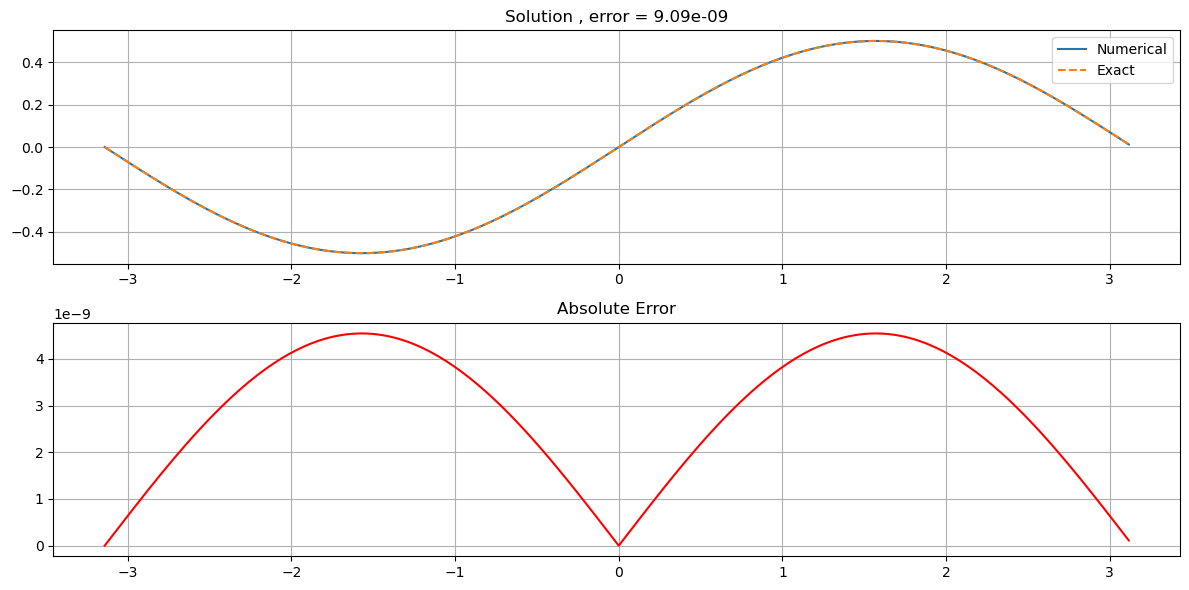

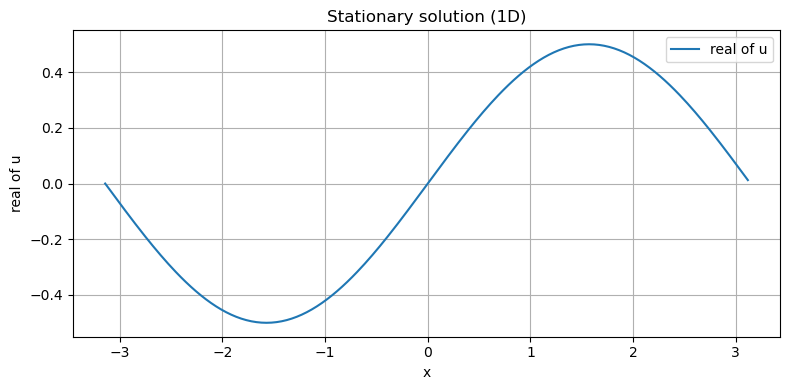

In [3]:
# Define symbolic variables
x = symbols('x')
xi = symbols('xi', real=True)
u = Function('u')(x)

# Equation: psiOp(xi^2 + 1, u)(x) = sin(x)
equation = Eq(psiOp(xi**2 + 1, u), sin(x))

# Exact solution (for testing)
def u_exact(x_vals):
    return np.sin(x_vals) / 2  # Uses numpy, not sympy

# Create the solver
solver = PDESolver(equation)

# Grid parameters
Lx = 2 * np.pi
Nx = 256

# Configure the solver with Dirichlet boundary condition
solver.setup(
    Lx=Lx,
    Nx=Nx,
    boundary_condition='dirichlet',
    initial_condition=None  # Not necessary for a stationary problem
)

# Solve the stationary problem
u_num = solver.solve_stationary_psiOp(order=1)

# Exact solution on grid
u_ref = u_exact(solver.X)

# Compute relative L2 error
error = np.linalg.norm(np.real(u_num) - u_ref) / np.linalg.norm(u_ref)

# Automatic test (uses the well-vectorized u_exact function)
solver.test(u_exact=u_exact, threshold=5e-3, component='real')

# Visualization of the solution
solver.show_stationary_solution(u=u_num, component='real')


## Stationnary equation with psiOp depending on $x$ and on $\xi$


*********************************
* Partial differential equation *
*********************************

     ⎛ 2  2          ⎞         
psiOp⎝x ⋅ξ  + 1, u(x)⎠ = sin(x)

********************
* Equation parsing *
********************


Equation rewritten in standard form: -sin(x) + psiOp(x**2*xi**2 + 1, u(x))
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: -sin(x) + psiOp(x**2*xi**2 + 1, u(x))
Analyzing term: -sin(x)
  --> Classified as source term
Analyzing term: psiOp(x**2*xi**2 + 1, u(x))
  --> Classified as pseudo linear term (psiOp)
Final linear terms: {}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(1, x**2*xi**2 + 1)]
Source terms: [-sin(x)]
⚠️  Pseudo‑differential operator detected: all other linear terms have been rejected.
⚠️ For psiOp, use interactive_symbol_analysis.

*******************************
* Solving the stationnary PDE *
*******************************

boundary condition:  dirichlet
✅ Elliptic pseudo-differential symbol: inversion 

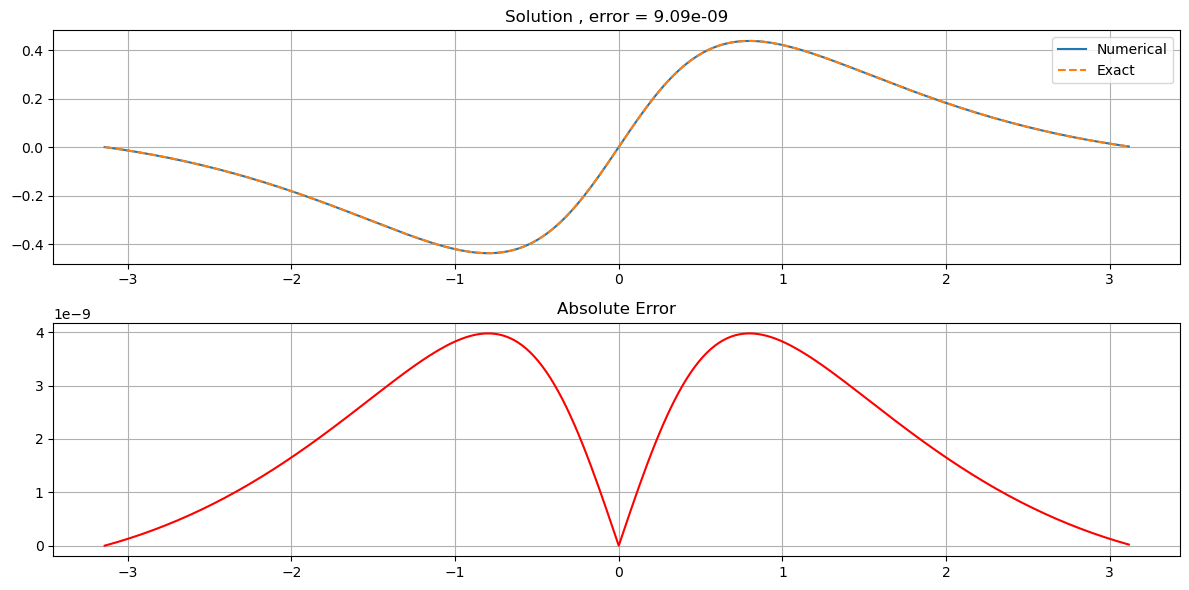

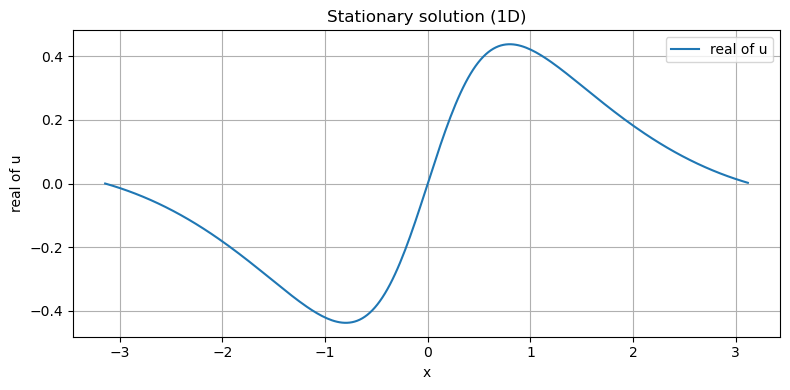

In [4]:
# Symbols
x = symbols('x')
xi = symbols('xi', real=True)
u = Function('u')(x)

# Pseudo-differential equation depending on x
equation = Eq(psiOp(x**2 * xi**2 + 1, u), sin(x))

# Exact solution (approximate here, for visual testing purposes)
def u_exact(x_vals):
    return np.sin(x_vals) / (x_vals**2 + 1)  # Corresponds to the symbol evaluated at xi=1 approximately

# Creation of the solver
solver = PDESolver(equation)

# Grid parameters
Lx = 2 * np.pi
Nx = 256

# Configuration of the solver with Dirichlet condition
solver.setup(
    Lx=Lx,
    Nx=Nx,
    boundary_condition='dirichlet',
    initial_condition=None
)

# Stationary solution with asymptotic inversion of order 1
u_num = solver.solve_stationary_psiOp(order=0)

# Comparison with approximate exact solution
solver.test(u_exact=u_exact, threshold=1, component='real')  # Larger tolerance here

# Visualization
solver.show_stationary_solution(u=u_num, component='real')


## Diffusion equation


*********************************
* Partial differential equation *
*********************************

∂                   ⎛ 2             ⎞
──(u(t, x)) = -psiOp⎝ξ  + 1, u(t, x)⎠
∂t                                   

********************
* Equation parsing *
********************


Equation rewritten in standard form: psiOp(xi**2 + 1, u(t, x)) + Derivative(u(t, x), t)
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: psiOp(xi**2 + 1, u(t, x)) + Derivative(u(t, x), t)
Analyzing term: psiOp(xi**2 + 1, u(t, x))
  --> Classified as pseudo linear term (psiOp)
Analyzing term: Derivative(u(t, x), t)
  Derivative found: Derivative(u(t, x), t)
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), t): 1}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(1, xi**2 + 1)]
Source terms: []
⚠️  Pseudo‑differential operator detected: all other linear terms have been rejected.

*******************************
* Linear operator computation *
********************

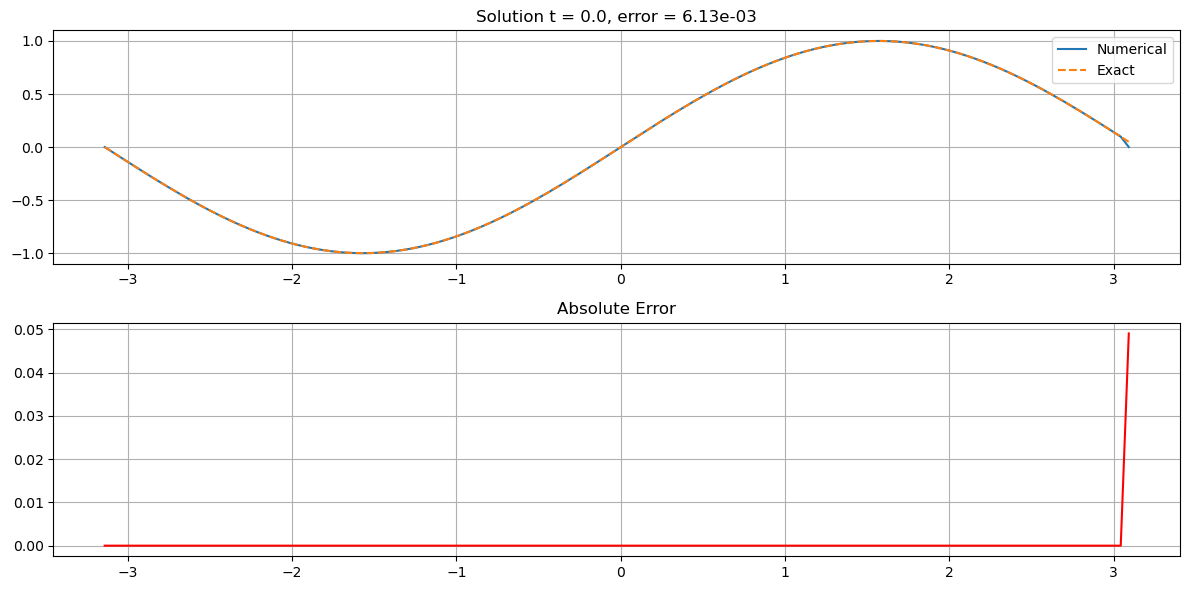

Closest available time to t_eval=0.5: 0.5
Test error t = 0.5: 3.257e-02


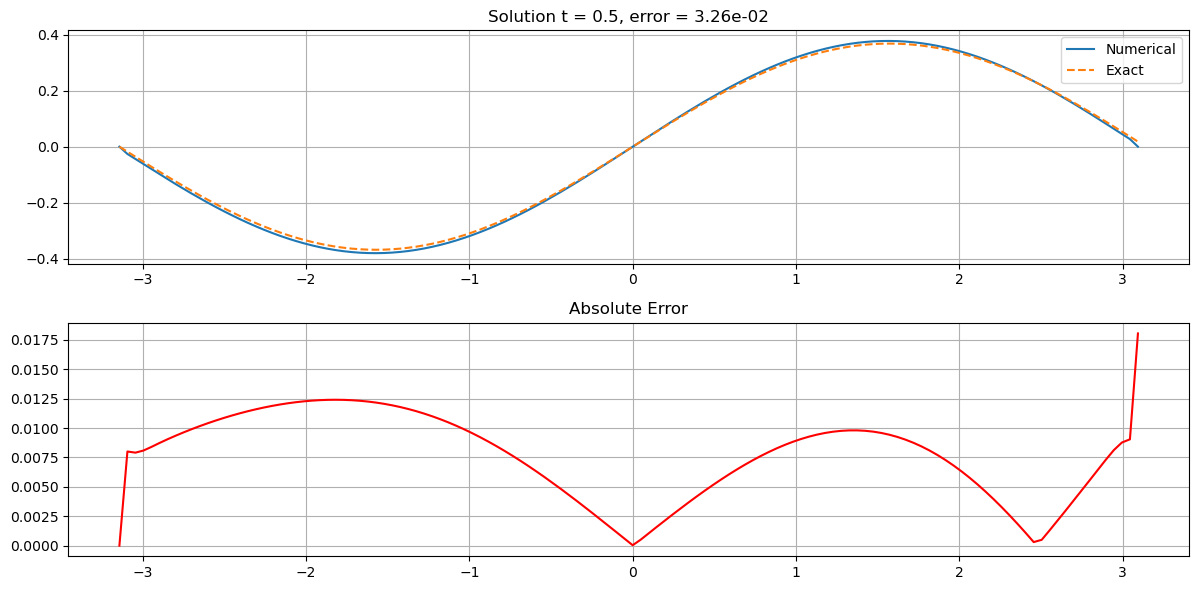

Closest available time to t_eval=1.0: 1.0
Test error t = 1.0: 3.453e-02


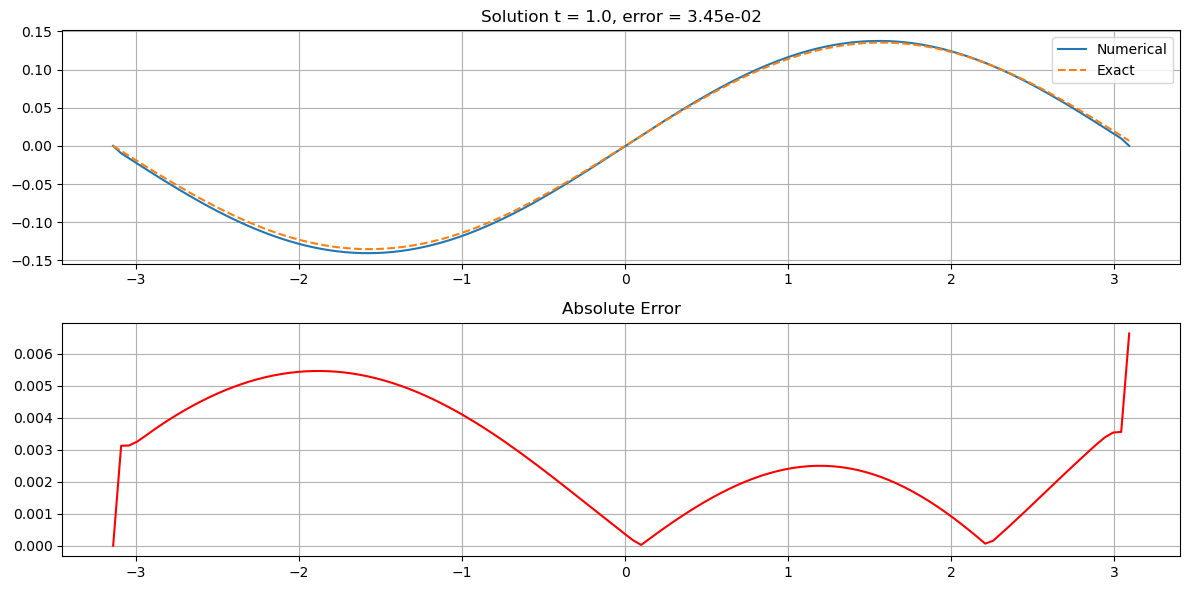

Closest available time to t_eval=1.5: 1.5
Test error t = 1.5: 3.900e-02


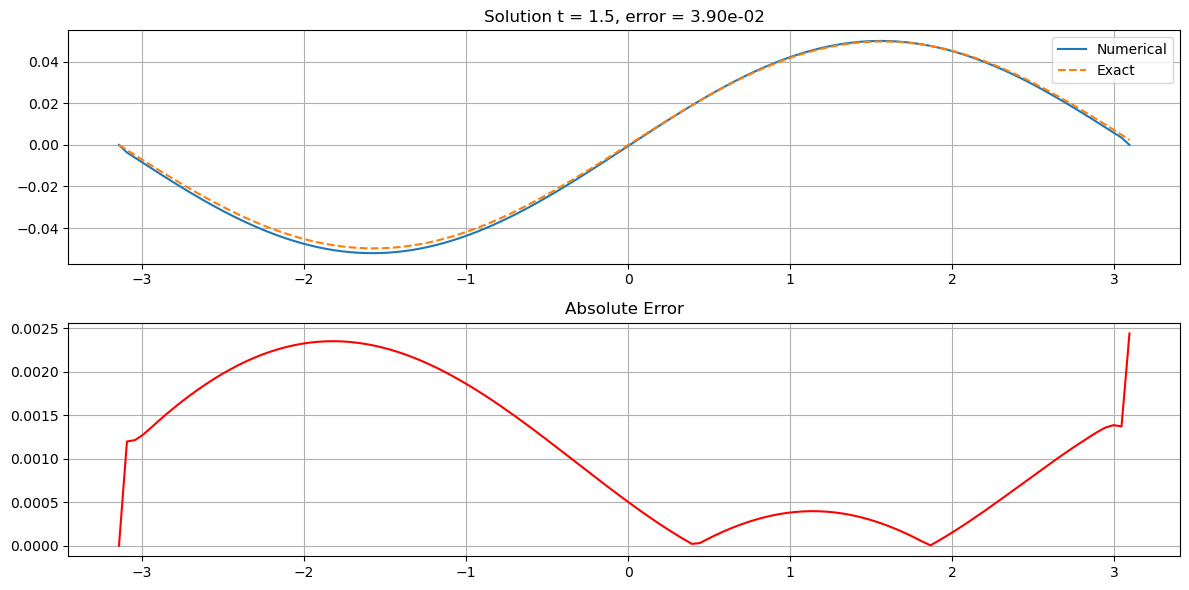

Closest available time to t_eval=2.0: 2.0
Test error t = 2.0: 4.851e-02


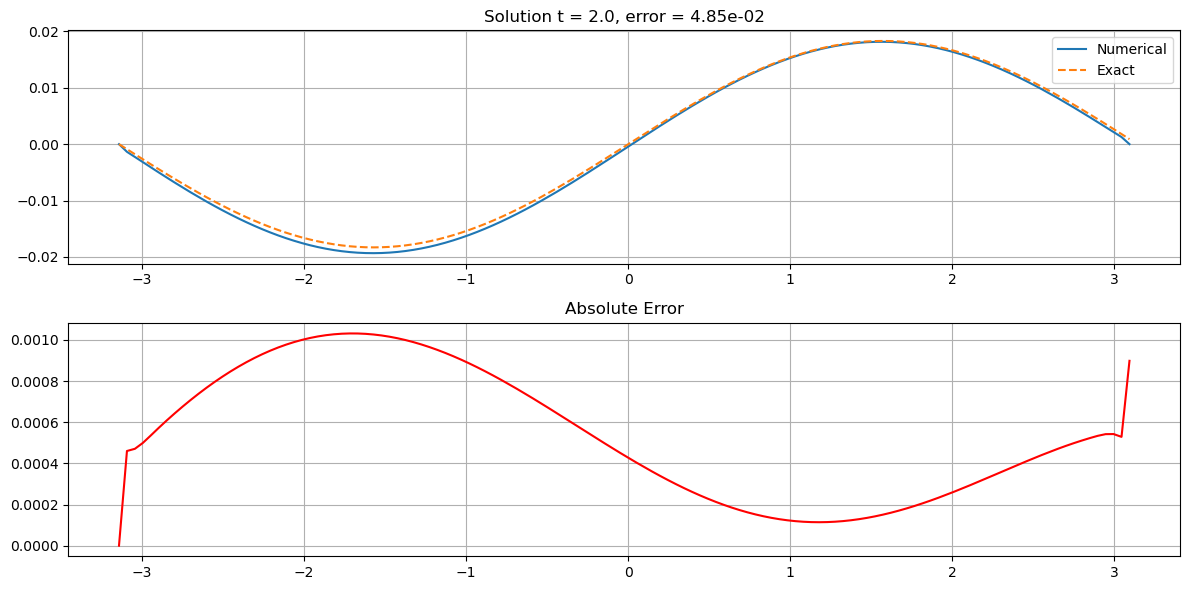

In [5]:
# Definition of symbols
t, x, xi = symbols('t x xi', real=True)
u = Function('u')

# Evolution equation (with psiOp): ∂u/∂t = -psiOp(ξ² + 1, u)
equation = Eq(diff(u(t,x), t), -psiOp(xi**2 + 1, u(t,x)))

# Creation of the solver
solver = PDESolver(equation)

# Parameters
Lx = 2 * np.pi
Nx = 128
Lt = 2.0
Nt = 400

# Initial condition
k0 = 1.0
initial_condition = lambda x: np.sin(k0 * x)

# Exact solution function
def u_exact(x, t):
    return np.sin(k0 * x) * np.exp(- (k0**2 + 1) * t)

# Setup with Dirichlet boundary condition
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition
)


# Solving
solver.solve()

# Automatic tests
n_test = 4
for i in range(n_test + 1):
    solver.test(u_exact=u_exact, t_eval=i * Lt / n_test, threshold=50, component='real')


## Wave equation


*********************************
* Partial differential equation *
*********************************

 2                                
∂                   ⎛  2         ⎞
───(u(t, x)) = psiOp⎝-ξ , u(t, x)⎠
  2                               
∂t                                

********************
* Equation parsing *
********************


Equation rewritten in standard form: -psiOp(-xi**2, u(t, x)) + Derivative(u(t, x), (t, 2))
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: -psiOp(-xi**2, u(t, x)) + Derivative(u(t, x), (t, 2))
Analyzing term: -psiOp(-xi**2, u(t, x))
  --> Classified as pseudo linear term (psiOp)
Analyzing term: Derivative(u(t, x), (t, 2))
  Derivative found: Derivative(u(t, x), (t, 2))
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), (t, 2)): 1}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(-1, -xi**2)]
Source terms: []
⚠️  Pseudo‑differential operator detected: all other linear terms have been rejected.

******

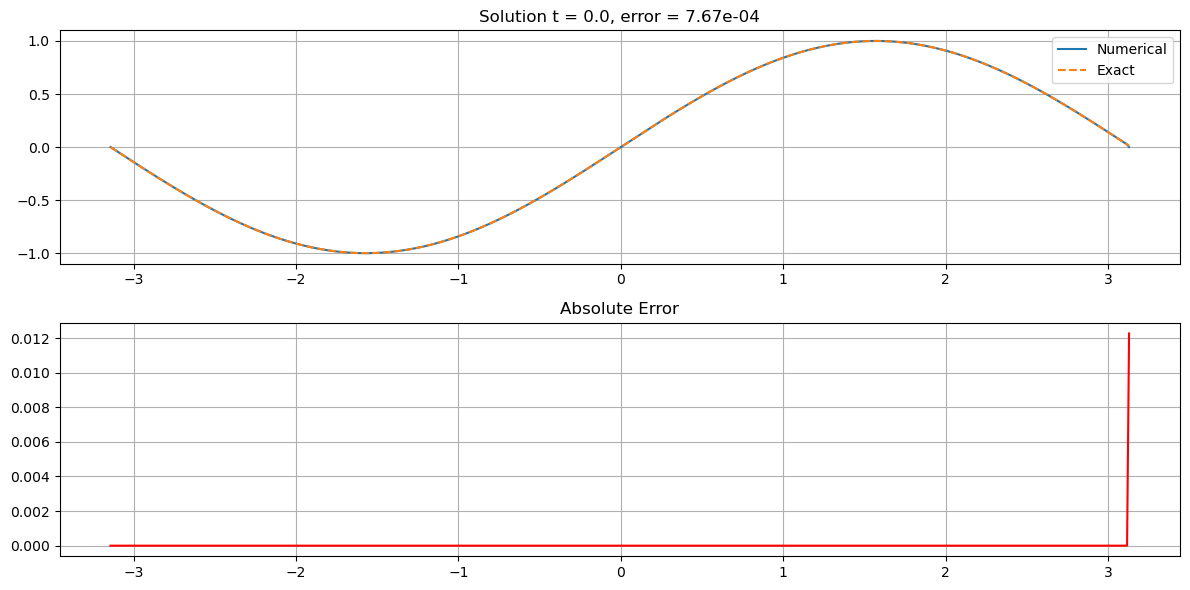

Closest available time to t_eval=0.5: 0.5
Test error t = 0.5: 2.373e-02


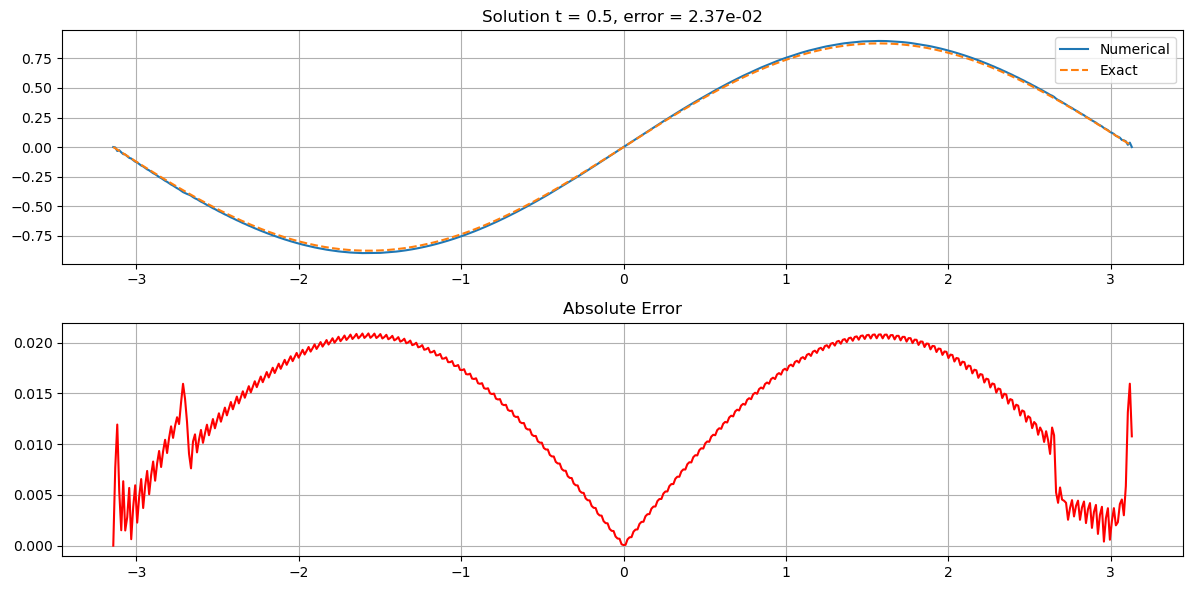

Closest available time to t_eval=1.0: 1.0
Test error t = 1.0: 6.917e-02


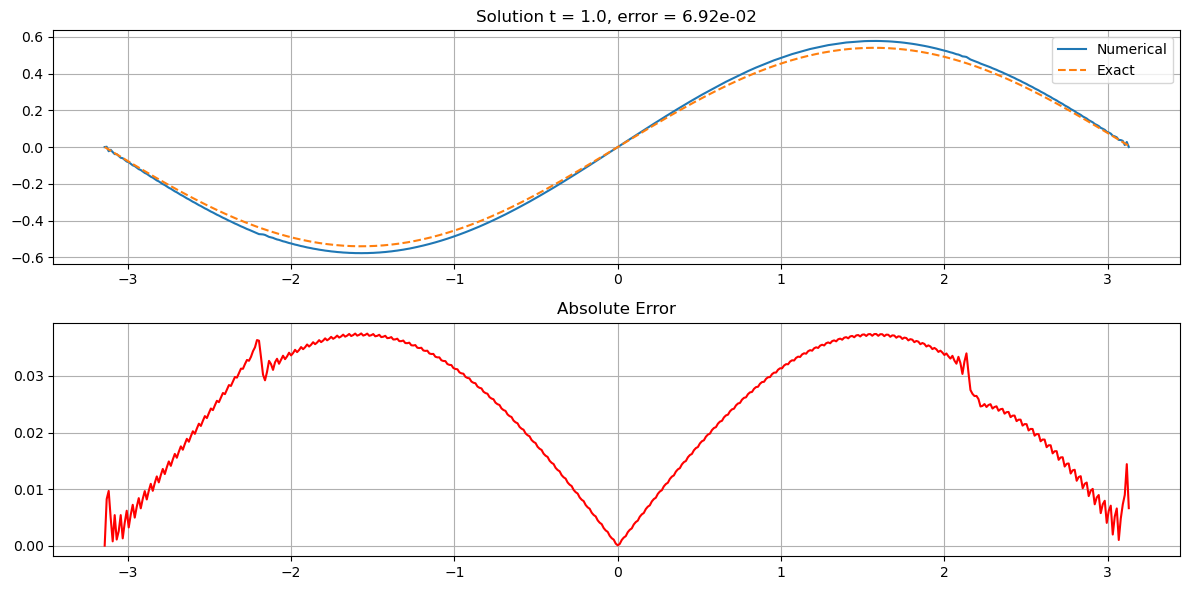

Closest available time to t_eval=1.5: 1.5
Test error t = 1.5: 6.339e-01


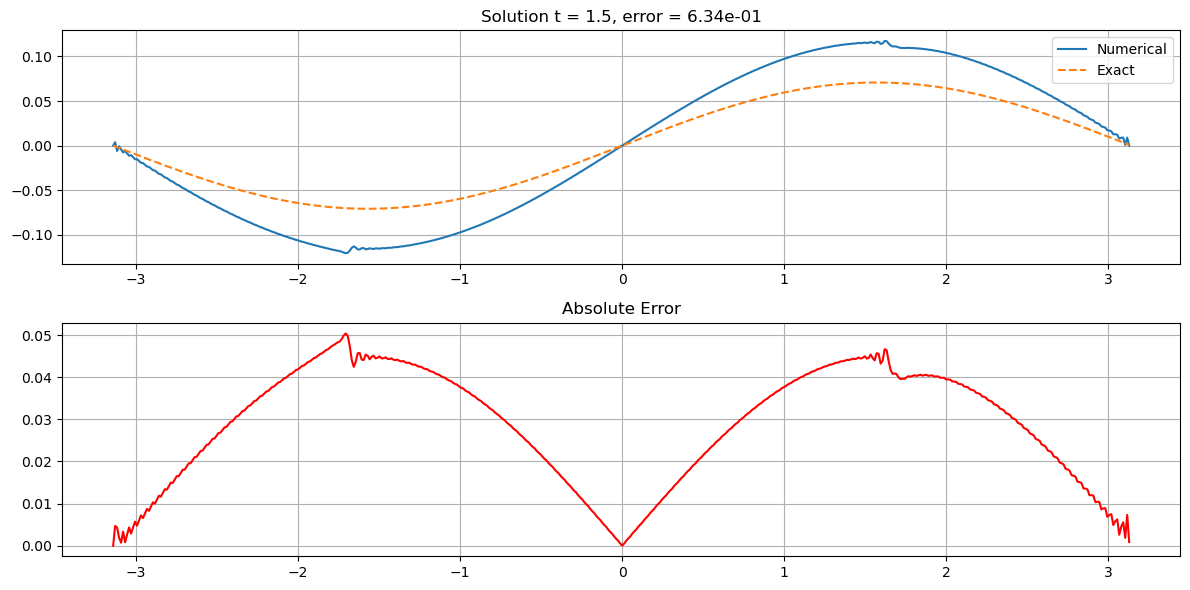

Closest available time to t_eval=2.0: 2.0
Test error t = 2.0: 9.942e-02


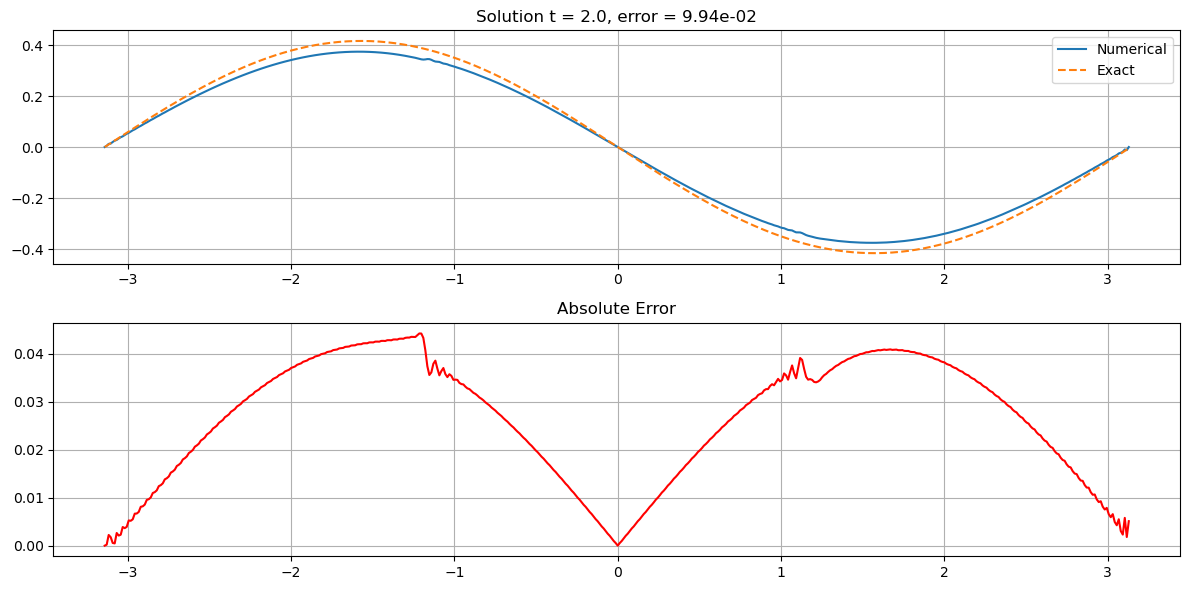

Closest available time to t_eval=2.5: 2.5
Test error t = 2.5: 3.476e-02


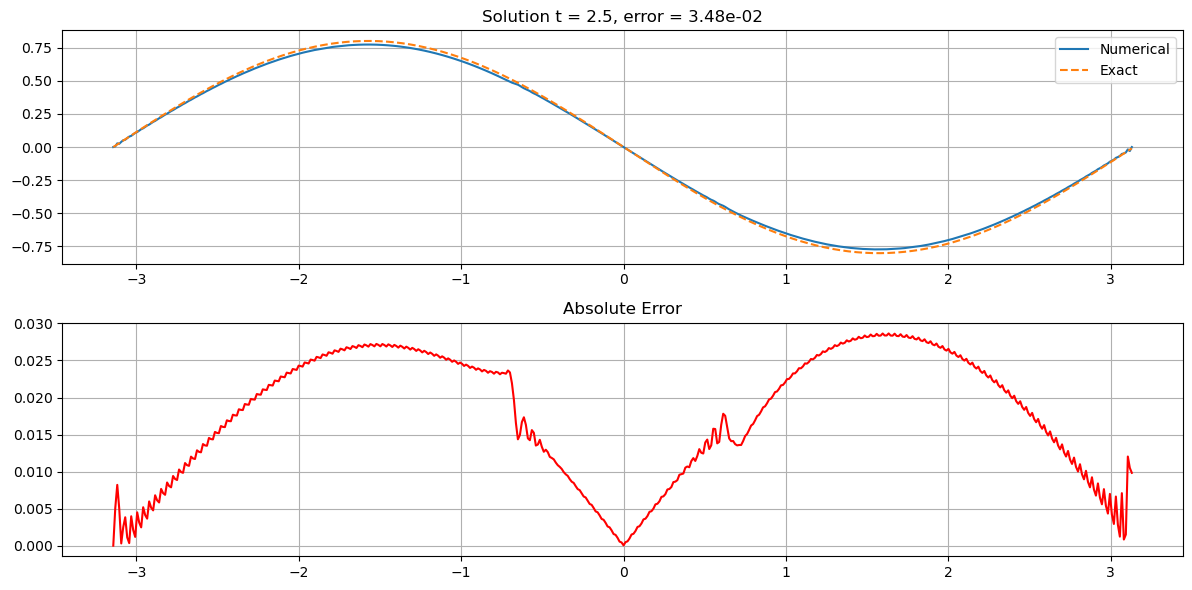

Closest available time to t_eval=3.0: 3.0
Test error t = 3.0: 7.989e-03


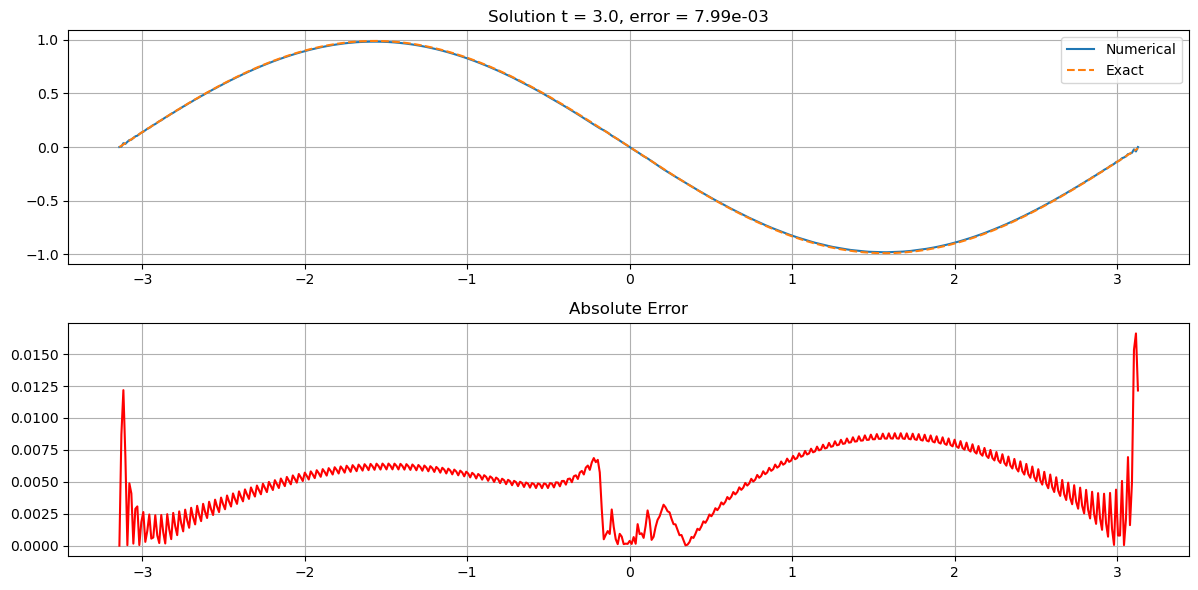

Closest available time to t_eval=3.5: 3.5
Test error t = 3.5: 1.617e-02


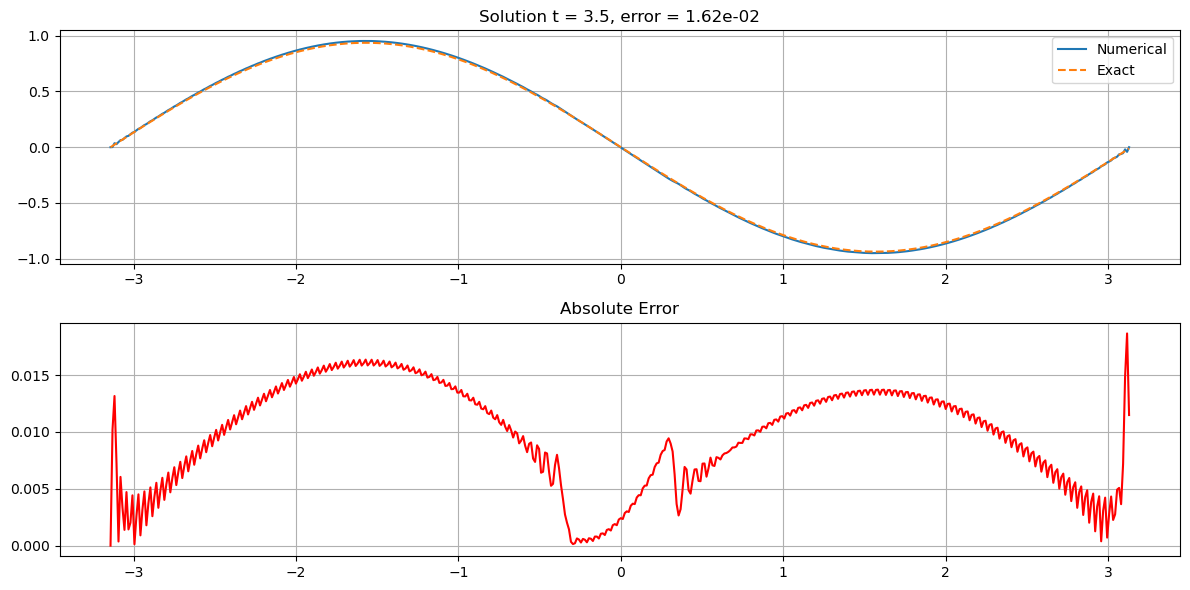

Closest available time to t_eval=4.0: 4.0
Test error t = 4.0: 5.120e-02


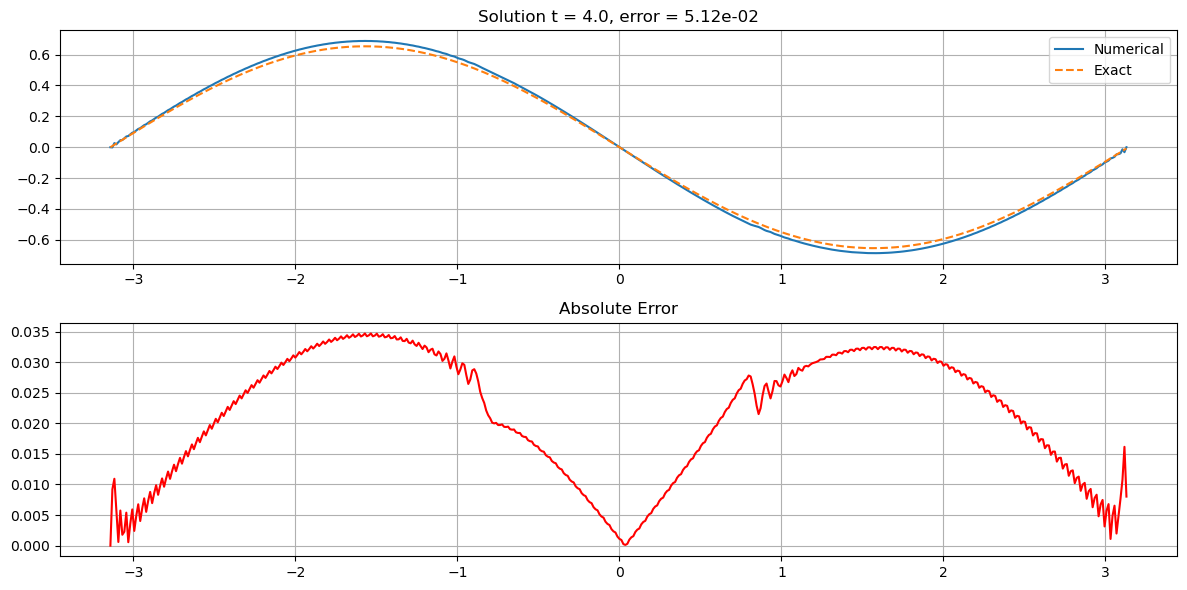

Closest available time to t_eval=4.5: 4.5
Test error t = 4.5: 2.079e-01


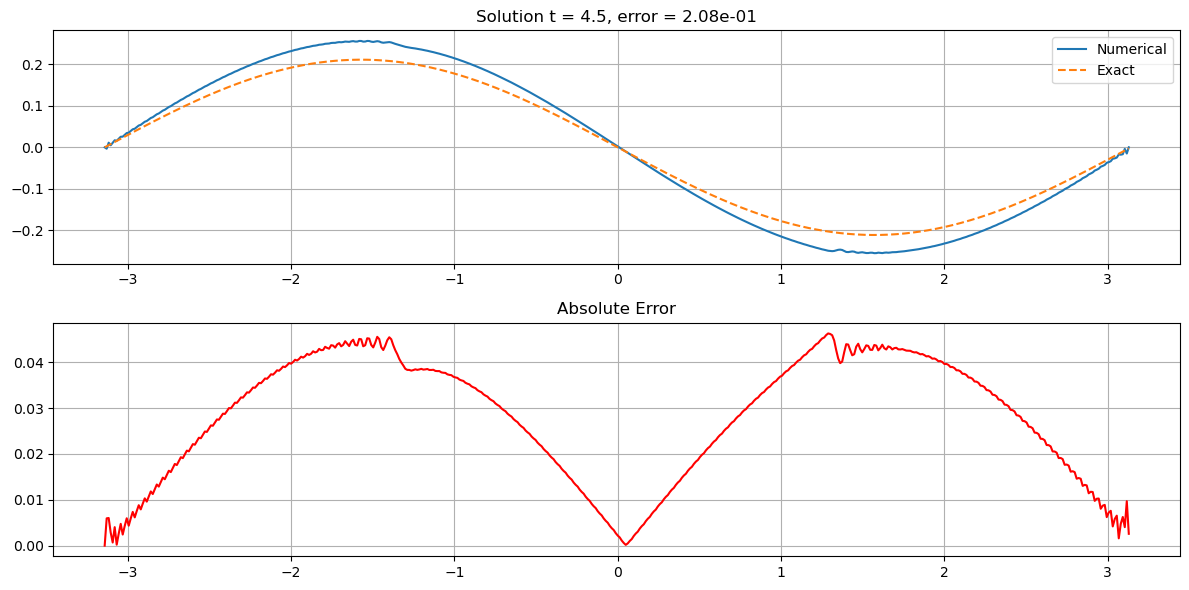

Closest available time to t_eval=5.0: 5.0
Test error t = 5.0: 1.534e-01


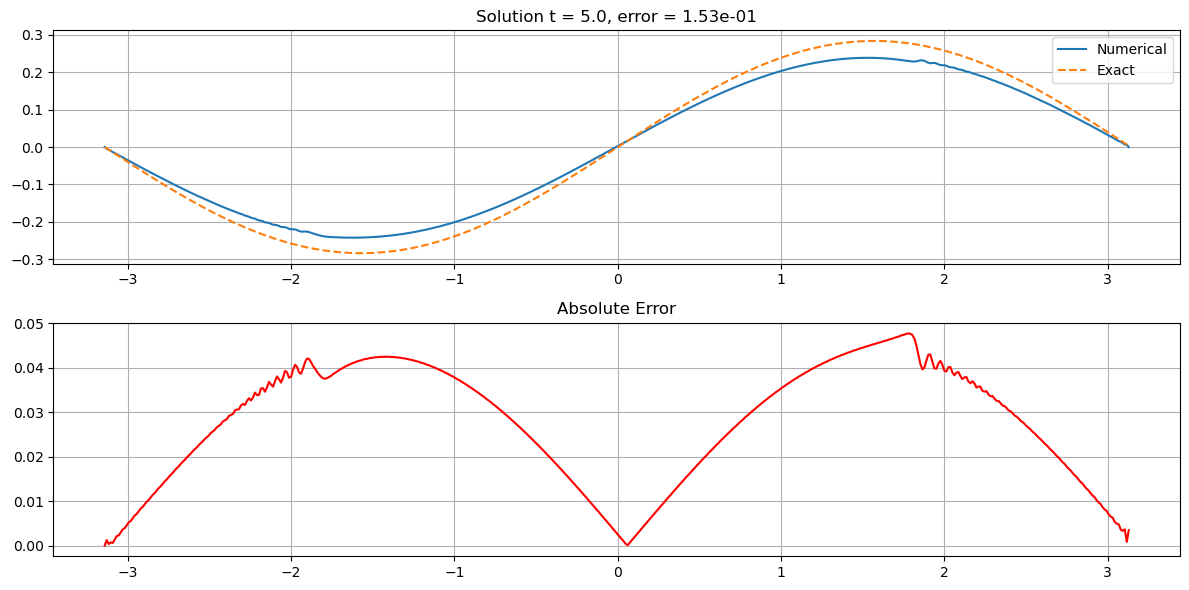

In [6]:
# Symbols
t, x, xi = symbols('t x xi', real=True)
u = Function('u')(t, x)

# Wave equation via psiOp
eq = Eq(diff(u, t, t), psiOp(-xi**2, u))

# Create the solver
solver = PDESolver(eq)

# Parameters
Lt = 5.0
Lx = 2 * np.pi
Nx = 512

# Setup with Dirichlet boundary conditions
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=1000,
    boundary_condition='dirichlet',
    initial_condition=lambda x: np.sin(x),
    initial_velocity=lambda x: np.zeros_like(x)
)

# Solve
solver.solve()

# Energy visualization
solver.plot_energy()
solver.plot_energy(log=True)

# Exact solution (eigenmode)
def u_exact(x, t):
    return np.sin(x) * np.cos(t)
    
# Automatic tests
n_test = 10
for i in range(n_test + 1):
    solver.test(u_exact=u_exact, t_eval=i * Lt / n_test, threshold=7e-1, component='real')


## Schrödinger equation


*********************************
* Partial differential equation *
*********************************

∂                  ⎛   2         ⎞
──(u(t, x)) = psiOp⎝ⅈ⋅ξ , u(t, x)⎠
∂t                                

********************
* Equation parsing *
********************


Equation rewritten in standard form: -psiOp(I*xi**2, u(t, x)) + Derivative(u(t, x), t)
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: -psiOp(I*xi**2, u(t, x)) + Derivative(u(t, x), t)
Analyzing term: -psiOp(I*xi**2, u(t, x))
  --> Classified as pseudo linear term (psiOp)
Analyzing term: Derivative(u(t, x), t)
  Derivative found: Derivative(u(t, x), t)
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), t): 1}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(-1, I*xi**2)]
Source terms: []
⚠️  Pseudo‑differential operator detected: all other linear terms have been rejected.

*******************************
* Linear operator computation *
*******************************



/home/fifi/pdesolver/solver.py:1415: RuntimeWarning: invalid value encountered in divide
  phi1_L = (exp_L - 1.0) / (self.dt * L_vals)


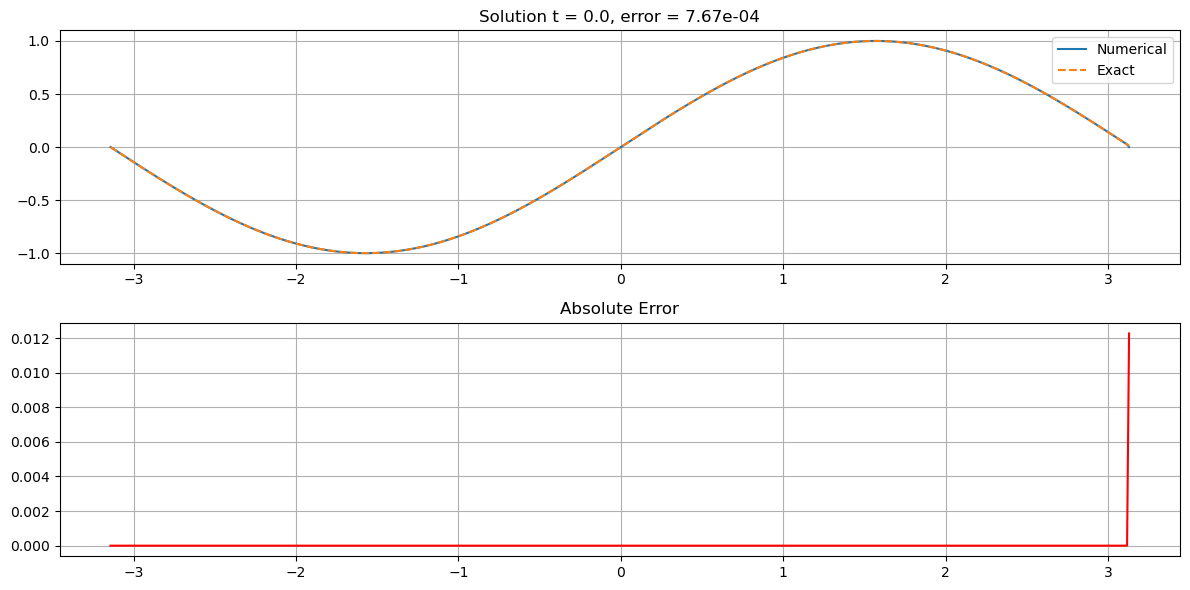

Closest available time to t_eval=1.0: 1.0
Test error t = 1.0: 6.196e-02


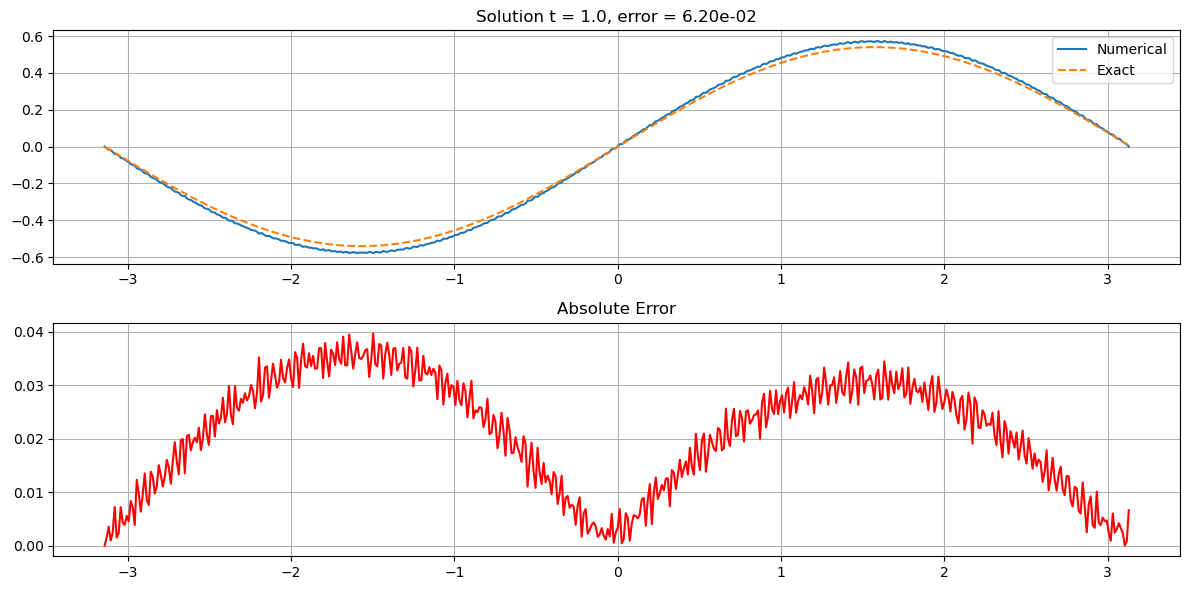

Closest available time to t_eval=2.0: 2.0
Test error t = 2.0: 8.956e-02


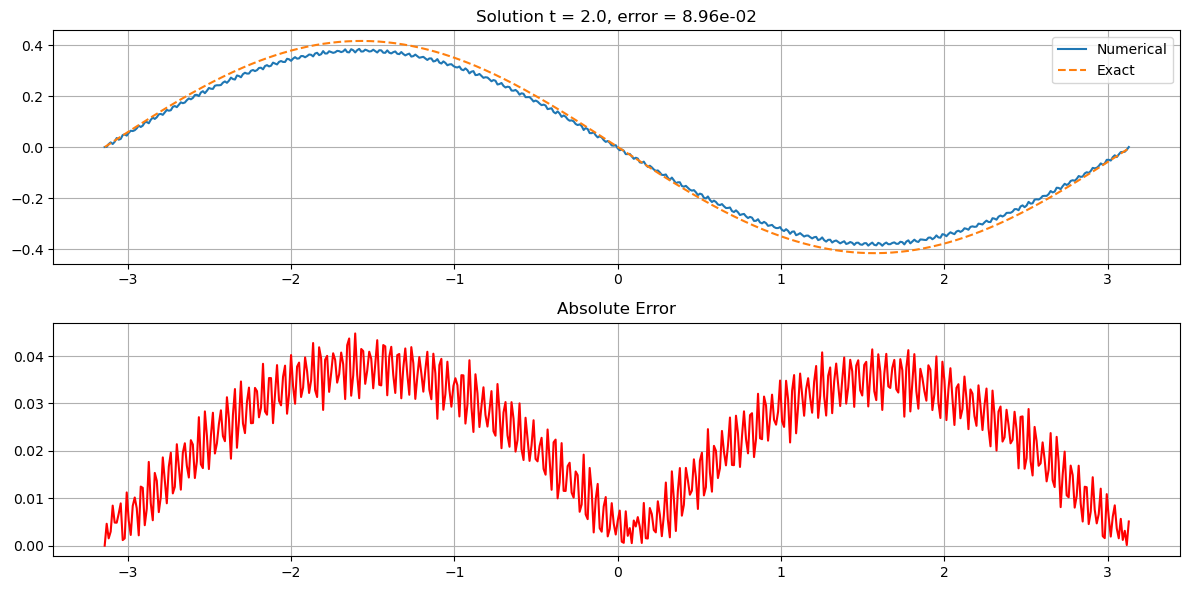

Closest available time to t_eval=3.0: 3.0
Test error t = 3.0: 1.159e-02


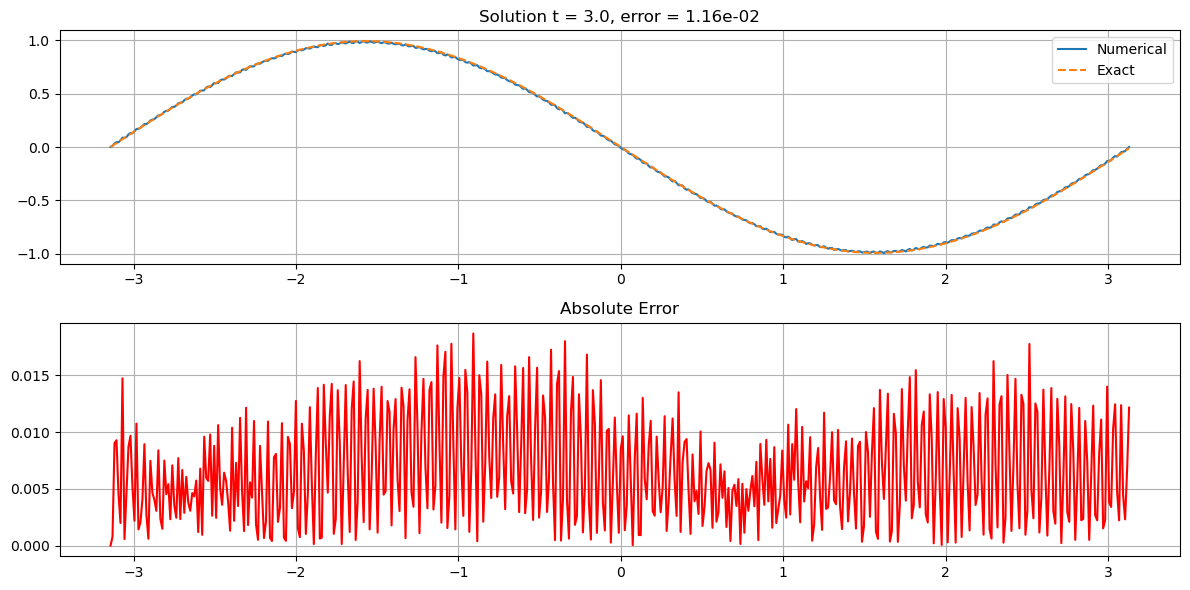

Closest available time to t_eval=4.0: 4.0
Test error t = 4.0: 4.598e-02


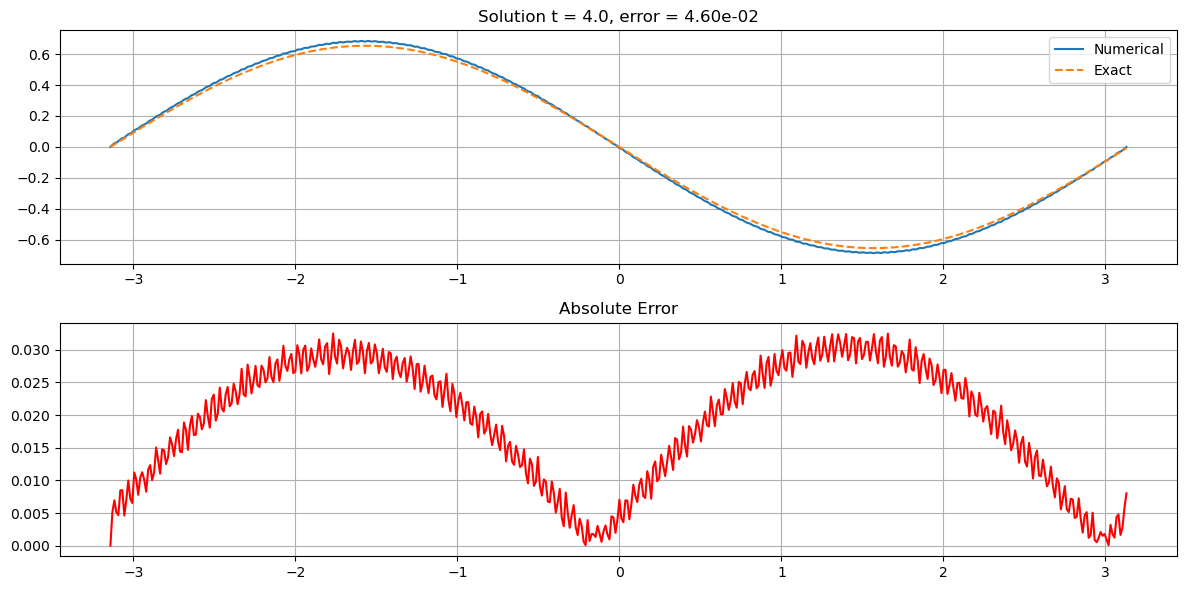

Closest available time to t_eval=5.0: 5.0
Test error t = 5.0: 1.375e-01


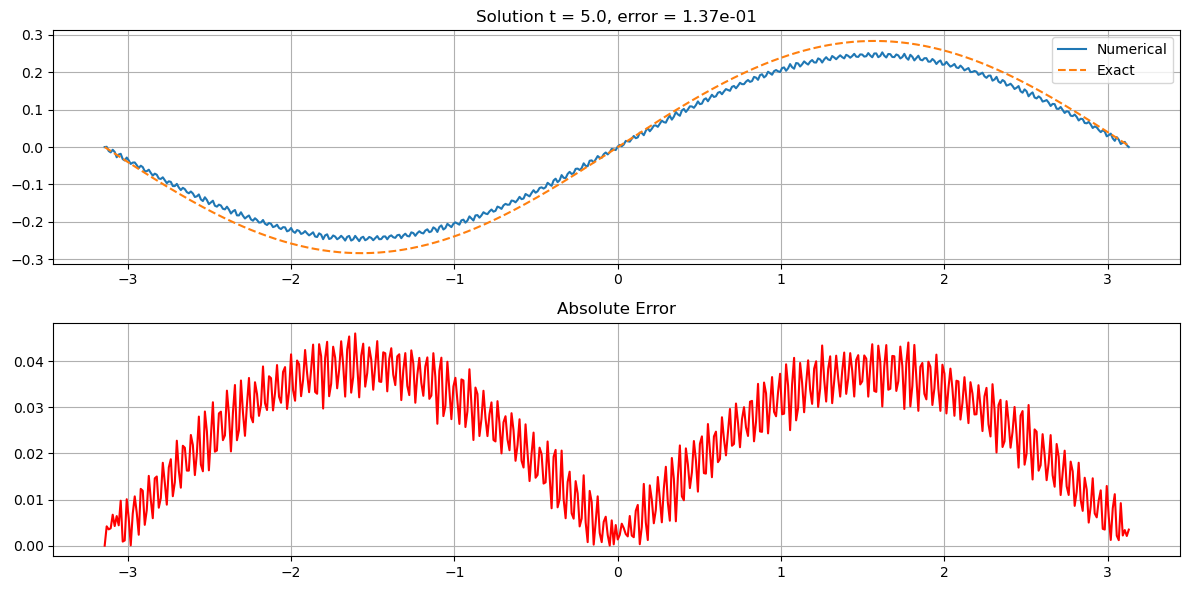

In [7]:
# Definition of symbols
t, x = symbols('t x', real=True)
u = Function('u')(t, x)

# Schrödinger equation (form adapted to the solver)
equation = Eq(diff(u, t), psiOp(I * xi**2, u))

# Creation of the solver
solver = PDESolver(equation)

# Parameters
Lx = 2 * np.pi
Nx = 512
Lt = 5.0
Nt = 500

# Initial condition: localized Gaussian (or sine)
initial_condition = lambda x: np.sin(x)
initial_velocity = None  # not used here
# Setup with Dirichlet conditions
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition
)

# Solving
solver.solve()

# Exact solution 
def u_exact(x, t):
    return np.exp(1j * t) * np.sin(x) 
    
# Tests (if applicable)
n_test = 5
for i in range(n_test + 1):
    solver.test(u_exact=u_exact, t_eval=i * Lt / n_test, threshold=7e-1, component='real')


## Equation with psiOp depending on $x$ but not on $\xi$


*********************************
* Partial differential equation *
*********************************

∂                   ⎛ 2             ⎞
──(u(t, x)) = -psiOp⎝x  + 1, u(t, x)⎠
∂t                                   

********************
* Equation parsing *
********************


Equation rewritten in standard form: psiOp(x**2 + 1, u(t, x)) + Derivative(u(t, x), t)
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: psiOp(x**2 + 1, u(t, x)) + Derivative(u(t, x), t)
Analyzing term: psiOp(x**2 + 1, u(t, x))
  --> Classified as pseudo linear term (psiOp)
Analyzing term: Derivative(u(t, x), t)
  Derivative found: Derivative(u(t, x), t)
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), t): 1}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(1, x**2 + 1)]
Source terms: []
⚠️  Pseudo‑differential operator detected: all other linear terms have been rejected.

*******************************
* Linear operator computation *
************************

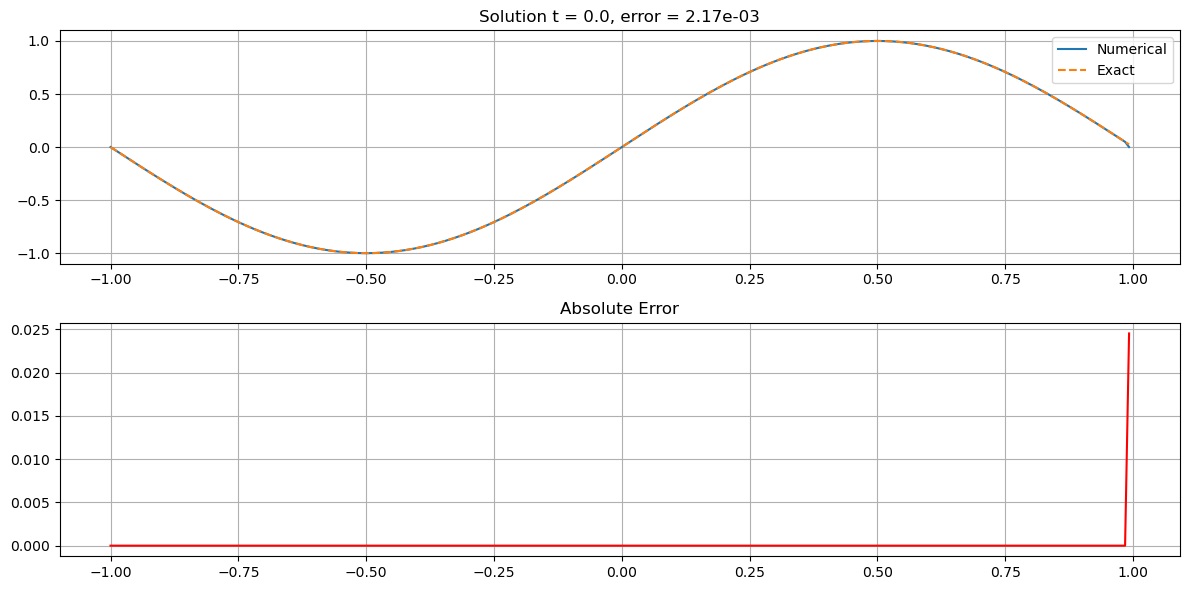

Closest available time to t_eval=0.4: 0.4
Test error t = 0.4: 1.499e-02


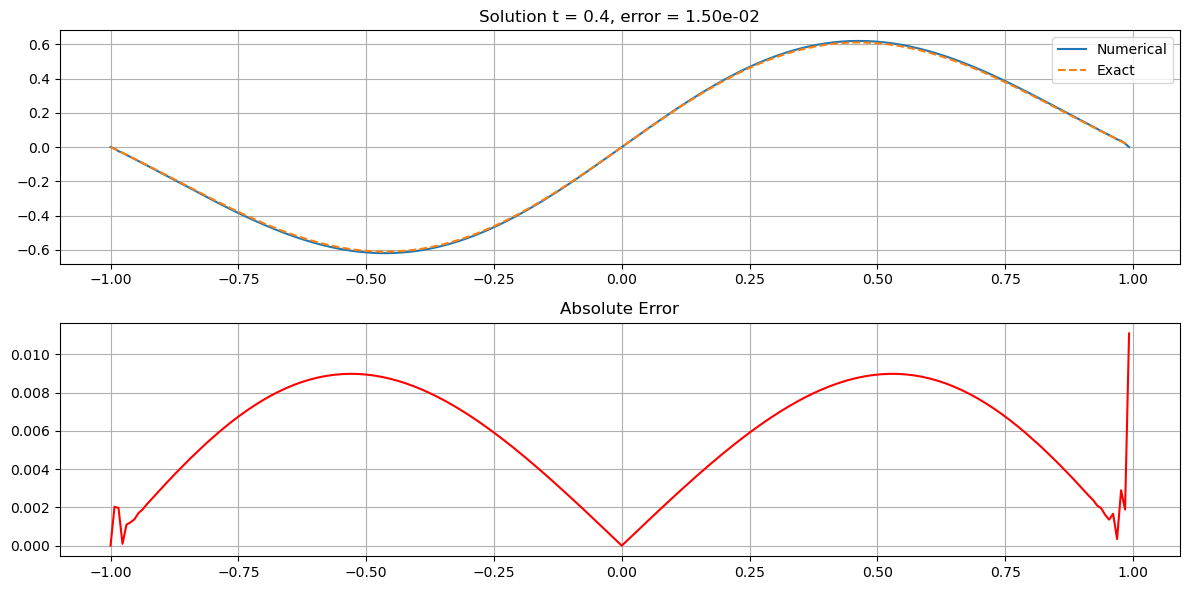

Closest available time to t_eval=0.8: 0.8
Test error t = 0.8: 1.256e-02


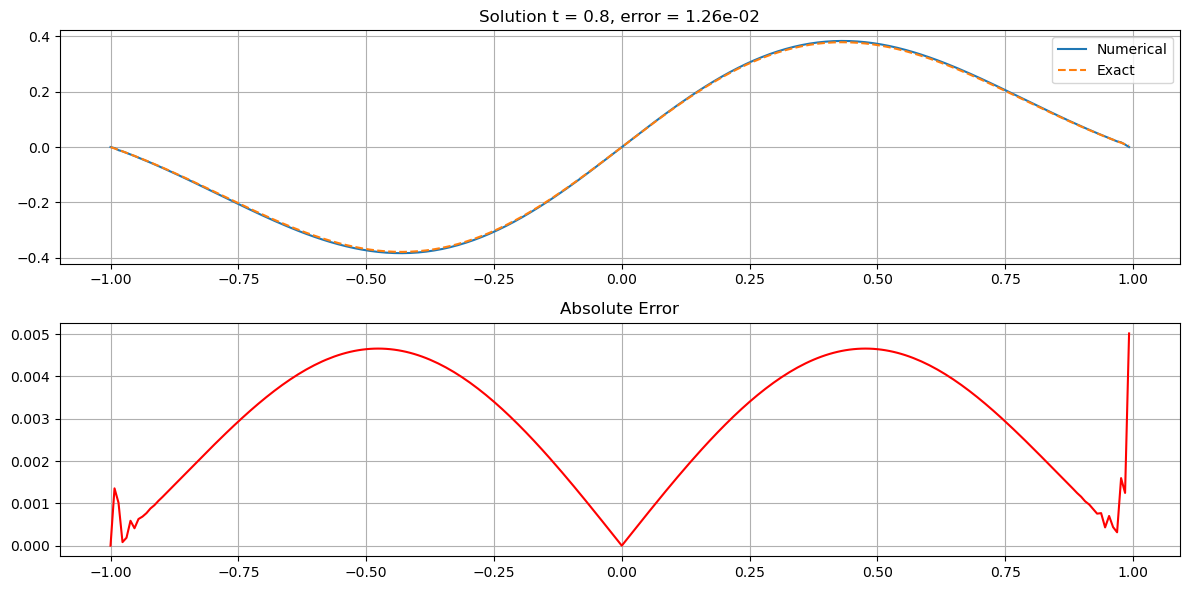

Closest available time to t_eval=1.2: 1.2
Test error t = 1.2: 1.035e-02


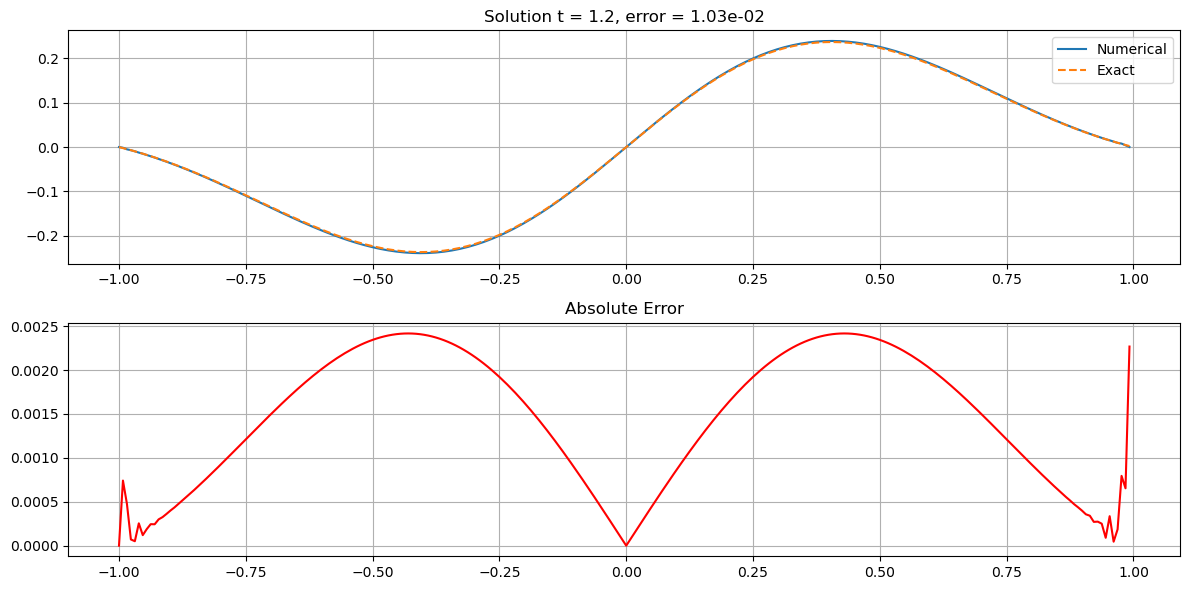

Closest available time to t_eval=1.6: 1.6
Test error t = 1.6: 8.302e-03


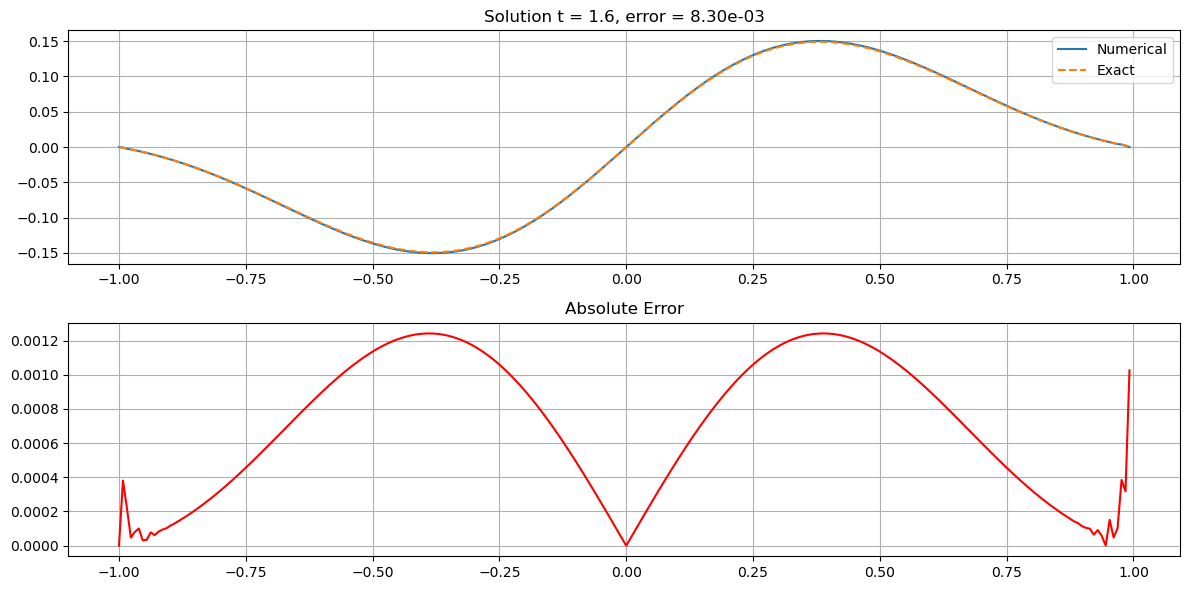

Closest available time to t_eval=2.0: 2.0
Test error t = 2.0: 6.409e-03


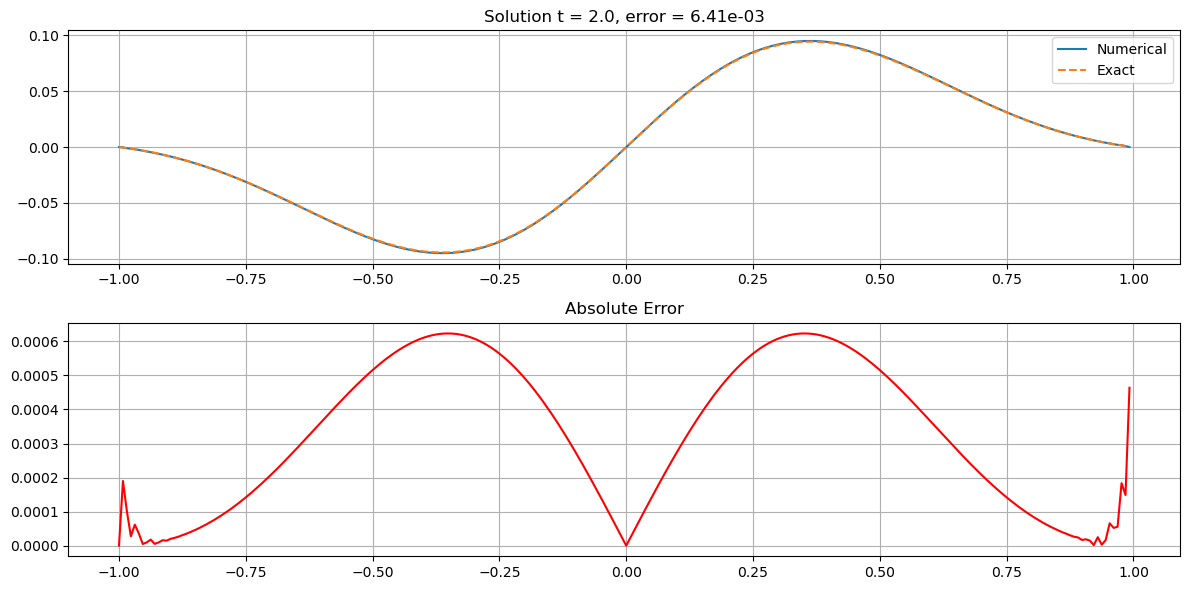

In [8]:
# Symbols
t, x, xi = symbols('t x xi', real=True)
u = Function('u')
# Symbol dependent on x only
symbol_expr = 1 + x**2
eq = Eq(diff(u(t,x), t), -psiOp(symbol_expr, u(t,x)))
# Creation of the solver
solver = PDESolver(eq)
# Domain: Dirichlet on [-1, 1]
Lx = 2.0
Nx = 256
Lt = 2.0
Nt = 300
# Initial condition: sin(π x), vanishes at ±1
def initial_condition(x):
    return np.sin(np.pi * x / (Lx/2))
# Exact solution
def u_exact(x, t):
    return initial_condition(x) * np.exp(-t * (1 + x**2))
# Setup with Dirichlet
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition
)
# Solving
solver.solve()
# Tests
n_test = 5
for i in range(n_test + 1):
    t_eval = i * Lt / n_test
    solver.test(
        u_exact=u_exact,
        t_eval=t_eval,
        threshold=5e-2,
        component='real'
    )


## Hermite equation


*********************************
* Partial differential equation *
*********************************

 2                                     
∂                    ⎛ 2    2         ⎞
───(u(t, x)) = -psiOp⎝x  + ξ , u(t, x)⎠
  2                                    
∂t                                     

********************
* Equation parsing *
********************


Equation rewritten in standard form: psiOp(x**2 + xi**2, u(t, x)) + Derivative(u(t, x), (t, 2))
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: psiOp(x**2 + xi**2, u(t, x)) + Derivative(u(t, x), (t, 2))
Analyzing term: psiOp(x**2 + xi**2, u(t, x))
  --> Classified as pseudo linear term (psiOp)
Analyzing term: Derivative(u(t, x), (t, 2))
  Derivative found: Derivative(u(t, x), (t, 2))
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), (t, 2)): 1}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(1, x**2 + xi**2)]
Source terms: []
⚠️  Pseudo‑differential operator detected: all o

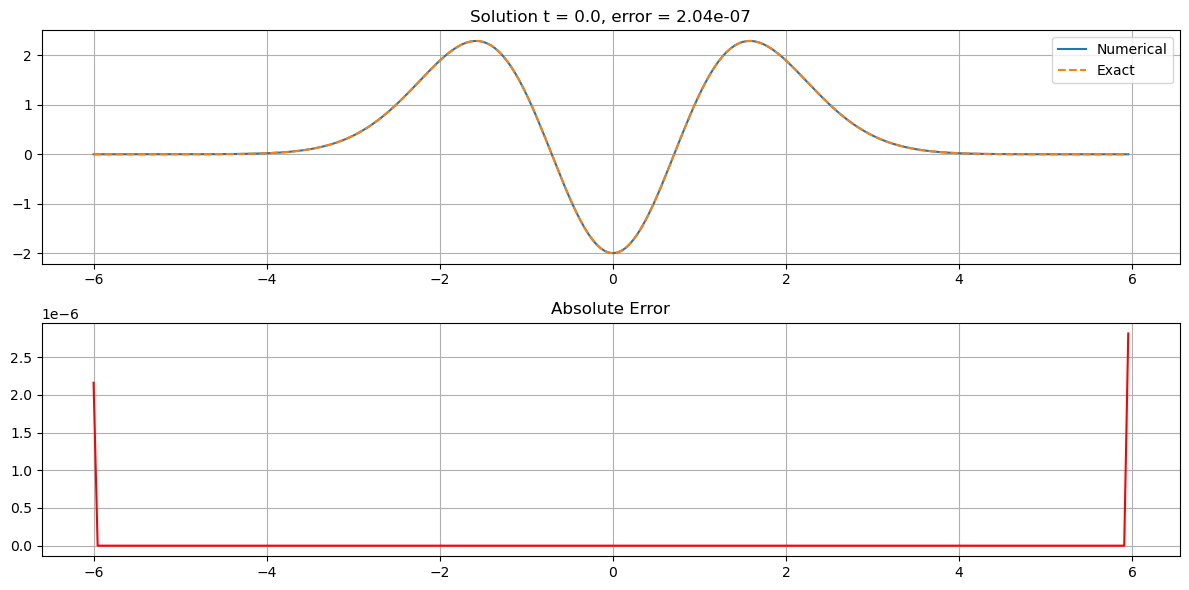

Closest available time to t_eval=0.6: 0.6
Test error t = 0.6: 2.379e-01


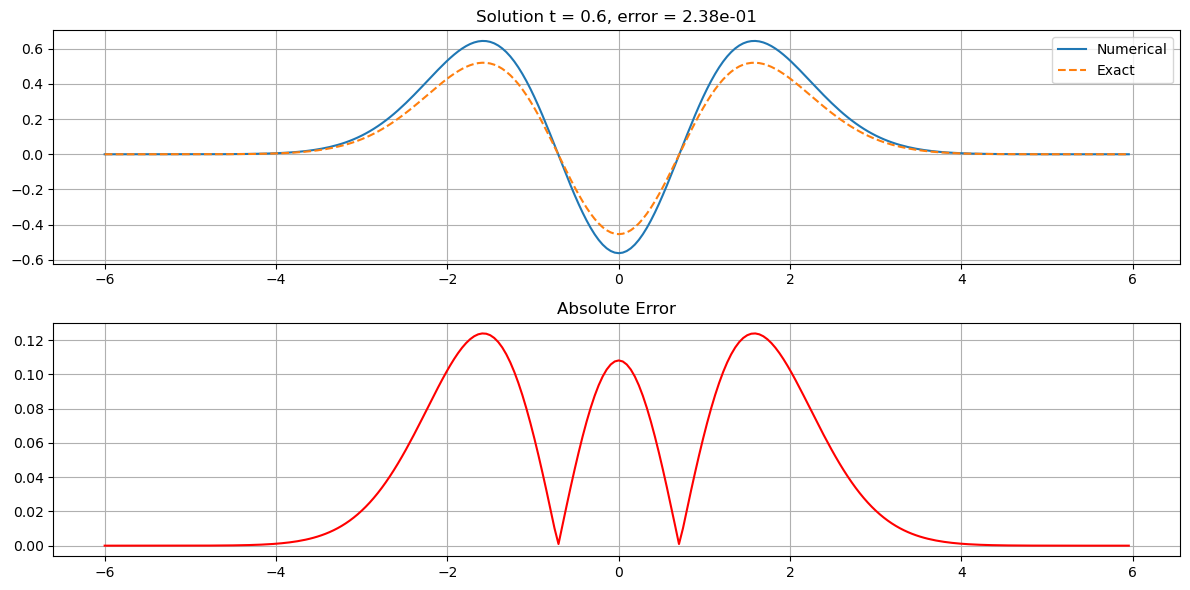

Closest available time to t_eval=1.2: 1.2
Test error t = 1.2: 2.912e-02


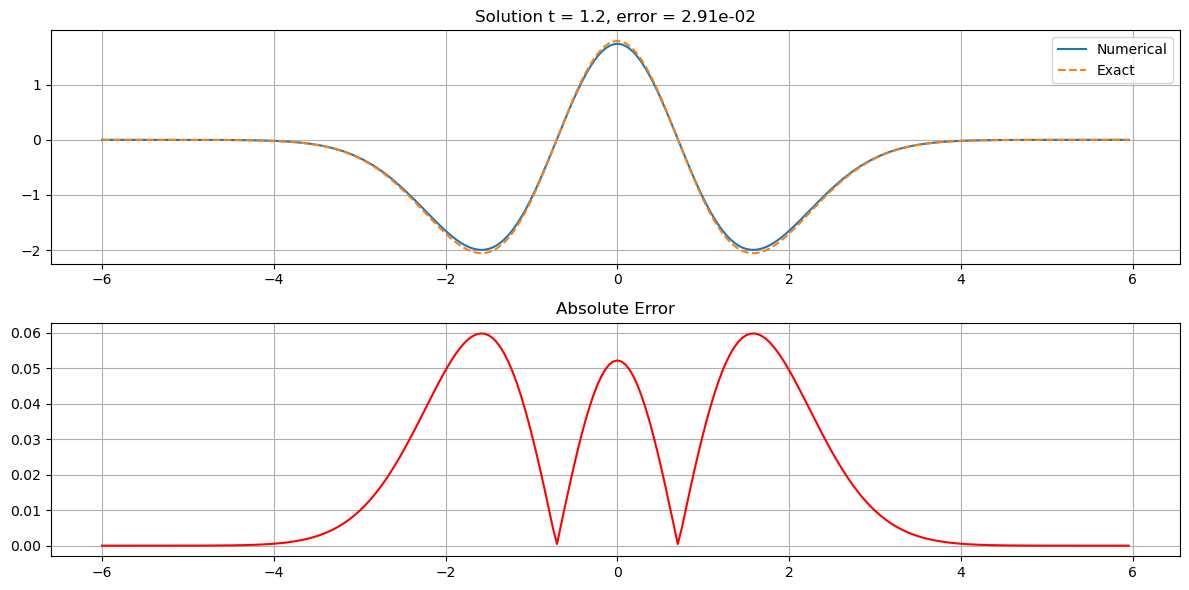

Closest available time to t_eval=1.8: 1.7999999999999998
Test error t = 1.7999999999999998: 6.646e-02


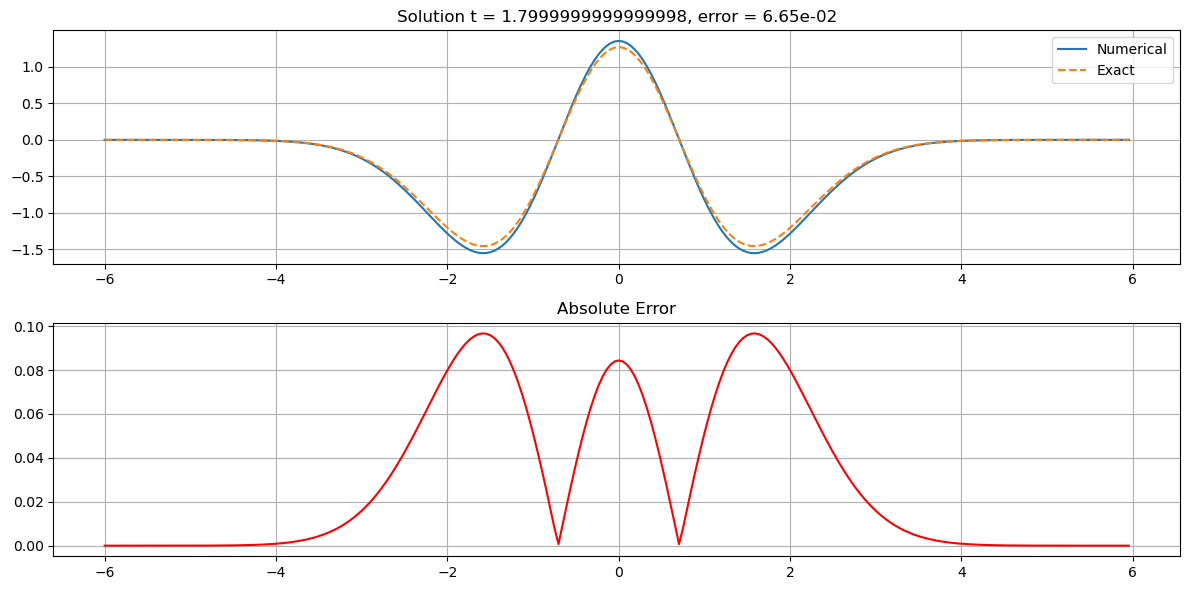

Closest available time to t_eval=2.4: 2.4
Test error t = 2.4: 7.439e-02


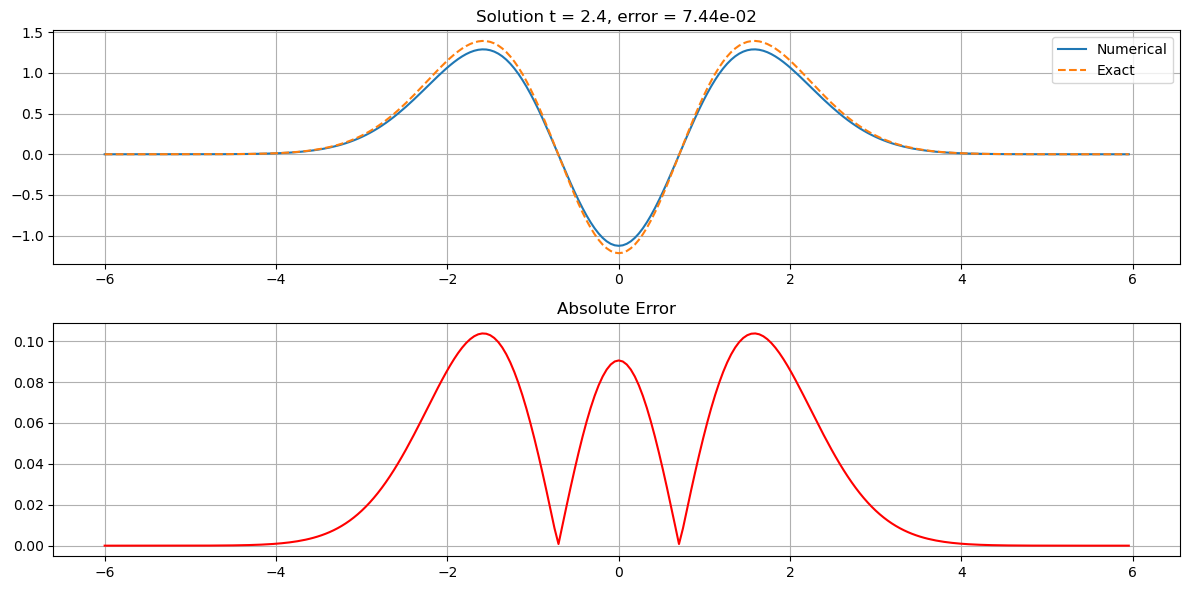

Closest available time to t_eval=3.0: 3.0
Test error t = 3.0: 2.371e-02


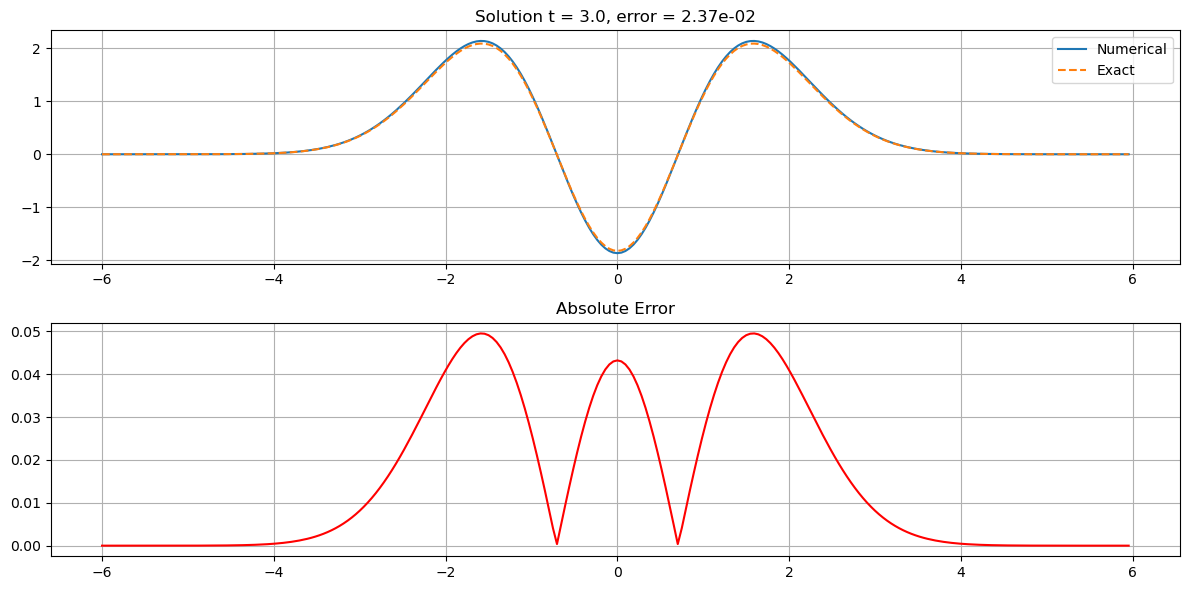

In [9]:
# Definition of symbols
t, x, xi = symbols('t x xi', real=True)
u = Function('u')

# Evolution equation: ∂²u/∂t² = -ψOp(x² + ξ², u)
p_expr = x**2 + xi**2
equation = Eq(diff(u(t,x), t, t), -psiOp(p_expr, u(t,x)))

# Creation of the solver
solver = PDESolver(equation)

# Parameters
Lx = 12.0
Nx = 256
Lt = 3.0
Nt = 600
n = 2                     # Order of Hermite
lambda_n = 2 * n + 1

# Initial function: u₀(x) = Hₙ(x) * exp(-x² / 2)
initial_condition = lambda x: eval_hermite(n, x) * np.exp(-x**2 / 2)

# Zero initial velocity: ∂ₜ u(0,x) = 0
initial_velocity = lambda x: 0.0 * x

# Exact solution
def u_exact(x, t):
    return np.cos(np.sqrt(lambda_n) * t) * eval_hermite(n, x) * np.exp(-x**2 / 2)

# Solver setup
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition,
    initial_velocity=initial_velocity,
)

# Solving
solver.solve()

# Validation tests
n_test = 5
for i in range(n_test + 1):
    t_eval = i * Lt / n_test
    solver.test(u_exact=u_exact, t_eval=t_eval, threshold=50, component='real')


## Airy equation


*********************************
* Partial differential equation *
*********************************

 2                                    
∂                    ⎛     2         ⎞
───(u(t, x)) = -psiOp⎝x + ξ , u(t, x)⎠
  2                                   
∂t                                    

********************
* Equation parsing *
********************


Equation rewritten in standard form: psiOp(x + xi**2, u(t, x)) + Derivative(u(t, x), (t, 2))
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: psiOp(x + xi**2, u(t, x)) + Derivative(u(t, x), (t, 2))
Analyzing term: psiOp(x + xi**2, u(t, x))
  --> Classified as pseudo linear term (psiOp)
Analyzing term: Derivative(u(t, x), (t, 2))
  Derivative found: Derivative(u(t, x), (t, 2))
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), (t, 2)): 1}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(1, x + xi**2)]
Source terms: []
⚠️  Pseudo‑differential operator detected: all other linear terms

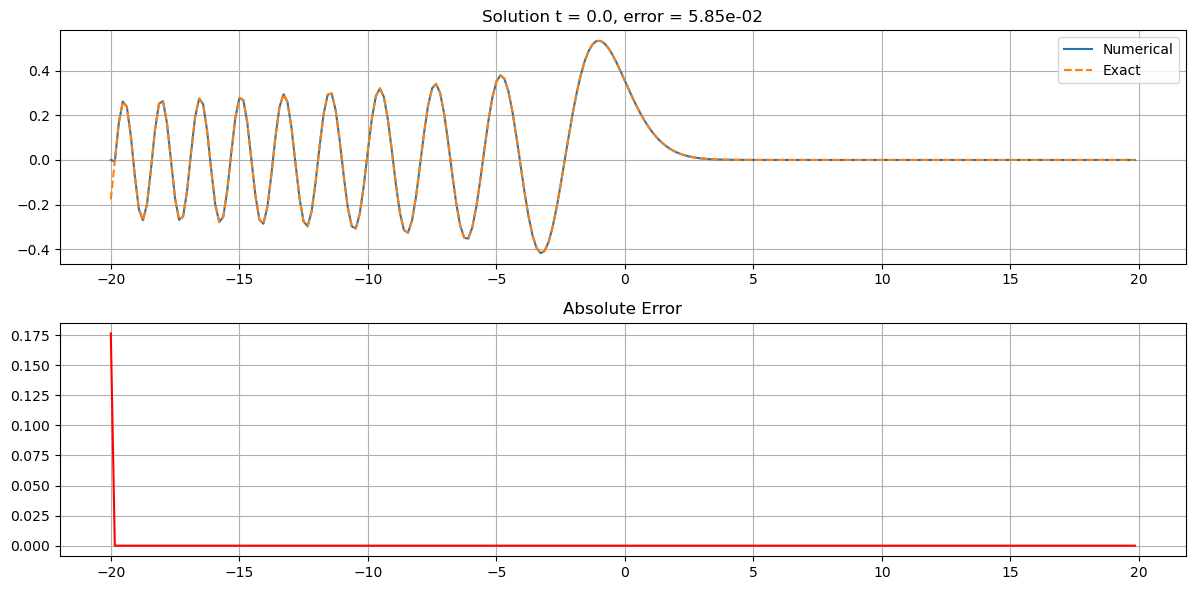

Closest available time to t_eval=0.4: 0.4
Test error t = 0.4: 1.767e-01


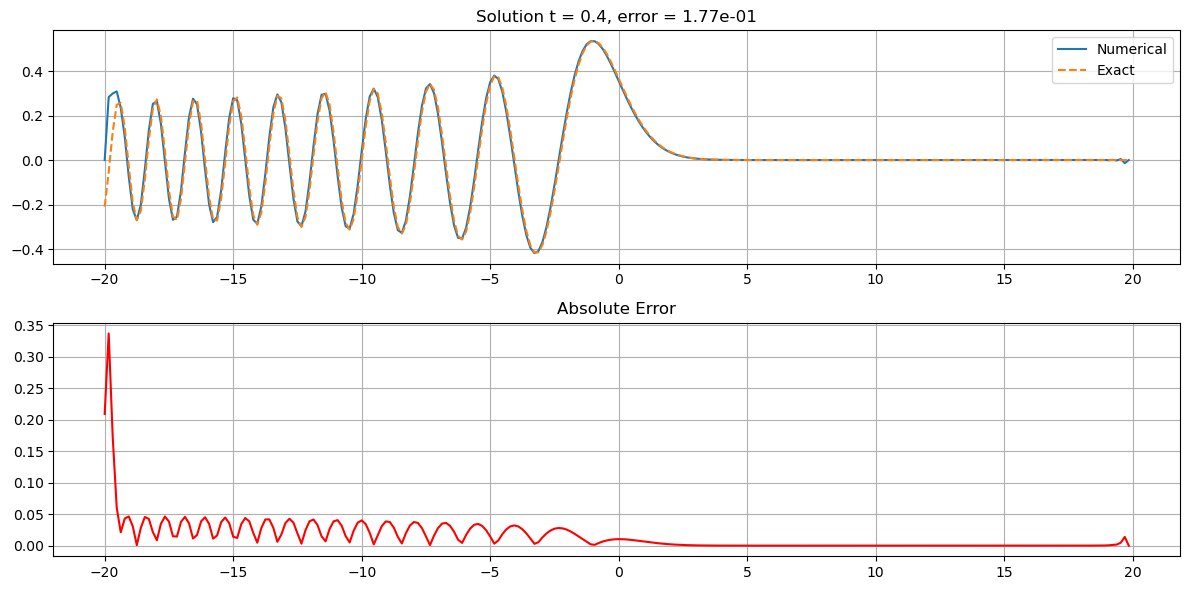

Closest available time to t_eval=0.8: 0.8
Test error t = 0.8: 5.971e-01


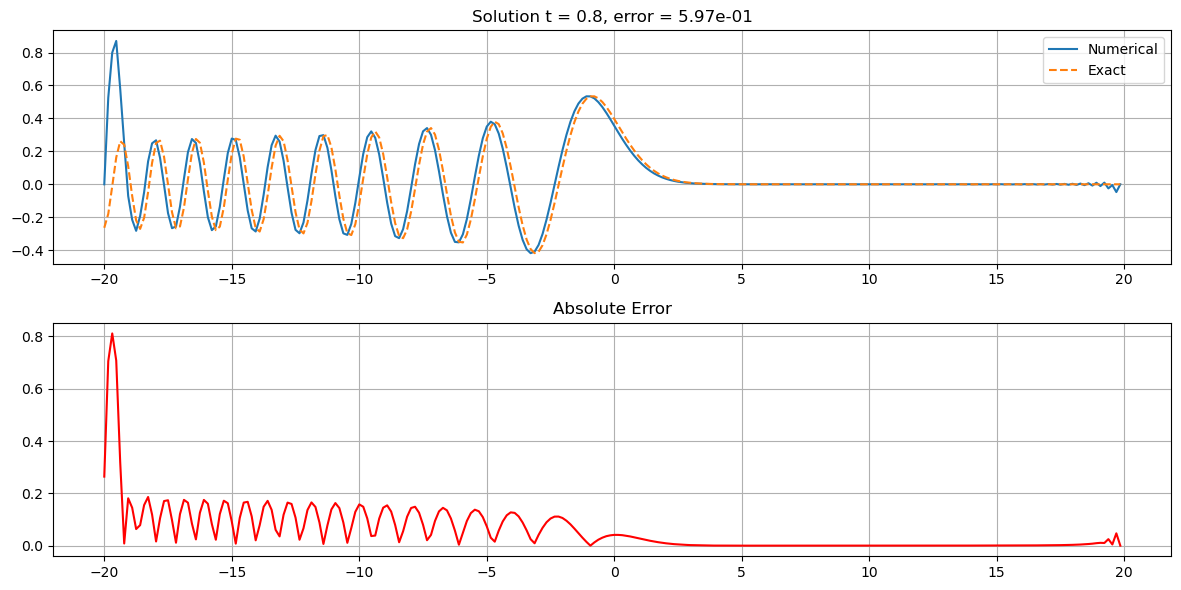

Closest available time to t_eval=1.2: 1.2
Test error t = 1.2: 1.707e+00


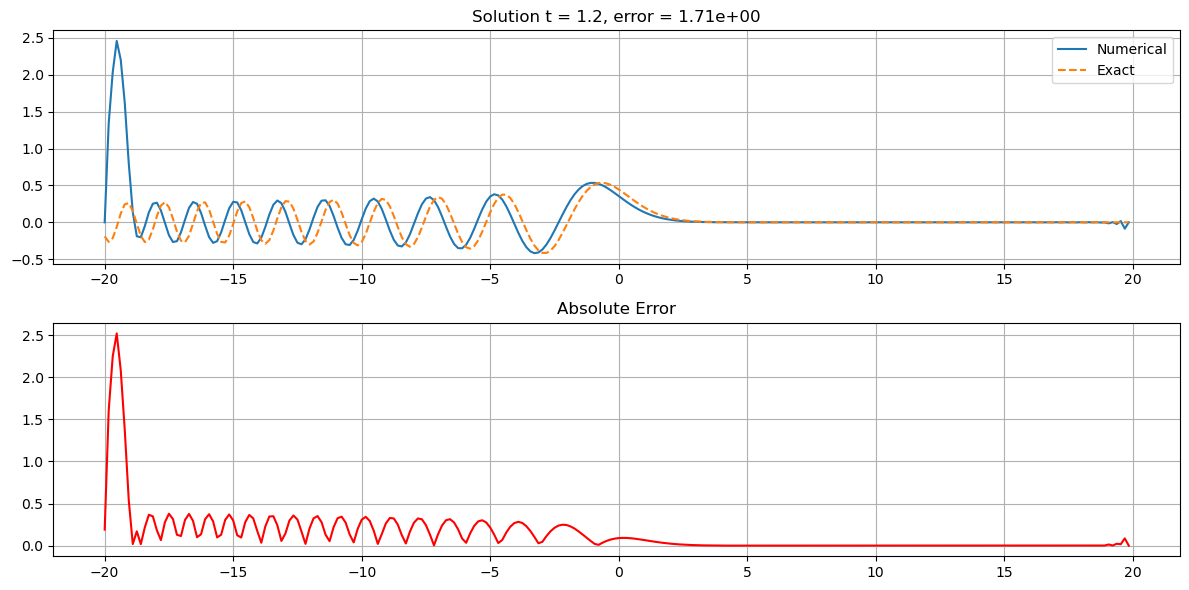

Closest available time to t_eval=1.6: 1.6
Test error t = 1.6: 6.164e+00


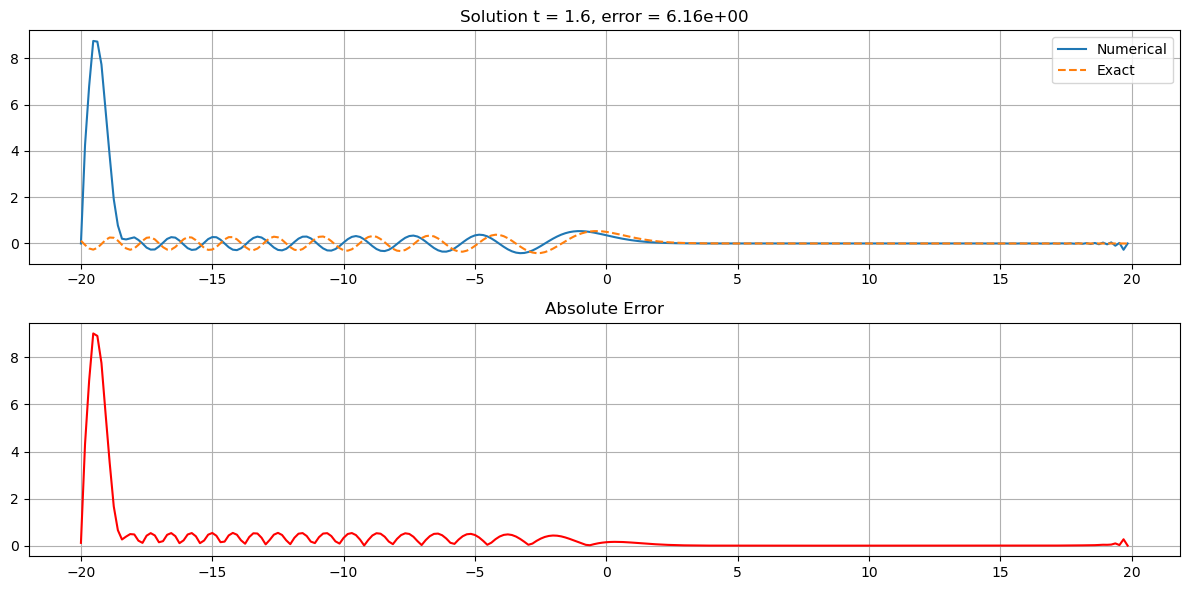

Closest available time to t_eval=2.0: 2.0
Test error t = 2.0: 2.740e+01


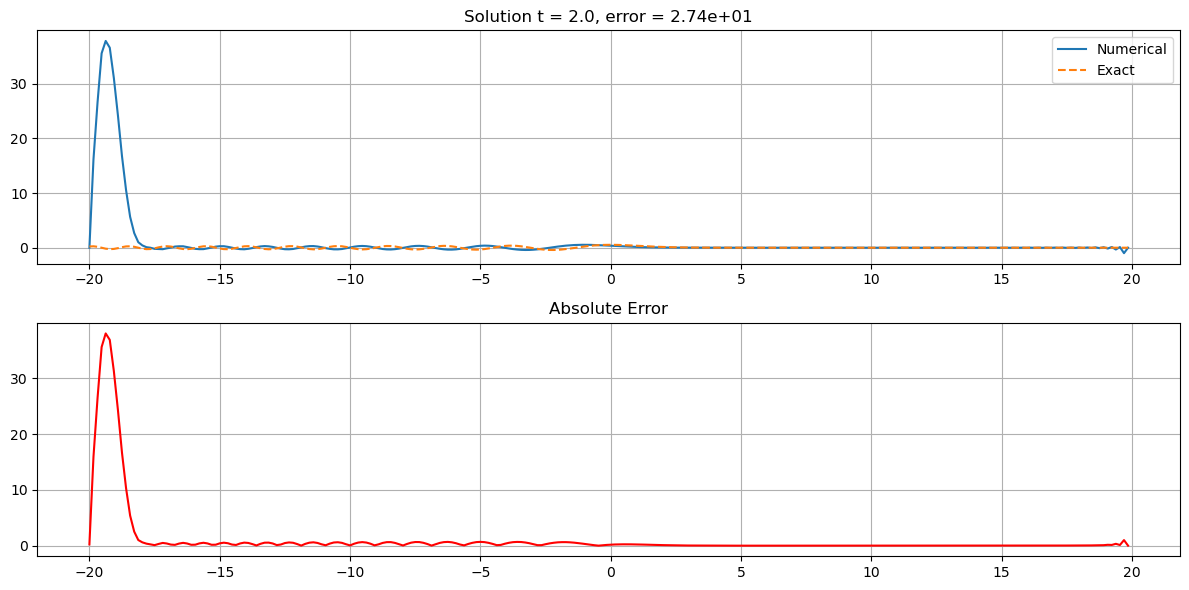

In [10]:
# Symbols
t, x, xi = symbols('t x xi', real=True)
u = Function('u')
# Airy Symbol: p(x, ξ) = x + ξ²
p_expr = x + xi**2
equation = Eq(diff(u(t,x), t, t), -psiOp(p_expr, u(t,x)))
# Solver creation
solver = PDESolver(equation)
# Numerical parameters
Lx = 40.0     # Large domain for Ai(x)
Nx = 256
Lt = 2.0
Nt = 1000
# Initial condition: u(0,x) = Ai(x)
initial_condition = lambda x: airy(x)[0]
# Initial temporal derivative: ∂ₜ u(0,x) = 0
initial_velocity = lambda x: 0.0 * x
# Exact solution: Ai(x - t²/4)
def u_exact(x, t):
    return airy(x - t**2 / 4)[0]
# Setup
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition,
    initial_velocity=initial_velocity,
)
# Solving
solver.solve()
# Automatic tests
n_test = 5
for i in range(n_test + 1):
    t_eval = i * Lt / n_test
    solver.test(u_exact=u_exact, t_eval=t_eval, threshold=50, component='real')


## Gaussian equation


*********************************
* Partial differential equation *
*********************************

 2                                     
∂                    ⎛ 2    2         ⎞
───(u(t, x)) = -psiOp⎝x  + ξ , u(t, x)⎠
  2                                    
∂t                                     

********************
* Equation parsing *
********************


Equation rewritten in standard form: psiOp(x**2 + xi**2, u(t, x)) + Derivative(u(t, x), (t, 2))
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: psiOp(x**2 + xi**2, u(t, x)) + Derivative(u(t, x), (t, 2))
Analyzing term: psiOp(x**2 + xi**2, u(t, x))
  --> Classified as pseudo linear term (psiOp)
Analyzing term: Derivative(u(t, x), (t, 2))
  Derivative found: Derivative(u(t, x), (t, 2))
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), (t, 2)): 1}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(1, x**2 + xi**2)]
Source terms: []
⚠️  Pseudo‑differential operator detected: all o

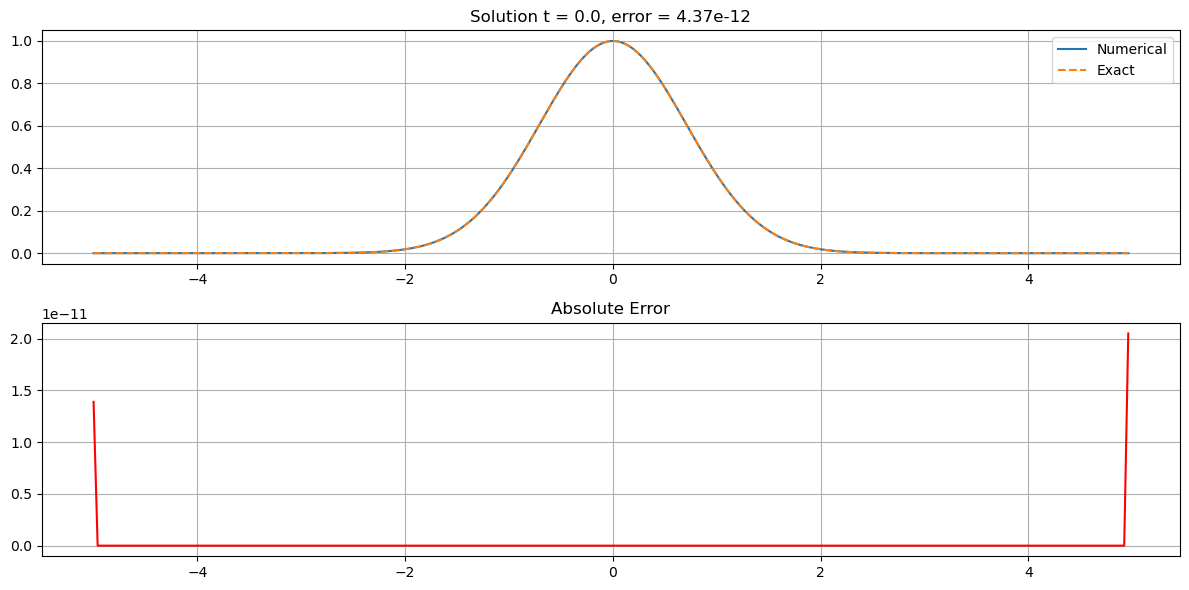

Closest available time to t_eval=1.2566370614359172: 1.2566370614359172
Test error t = 1.2566370614359172: 9.456e-01


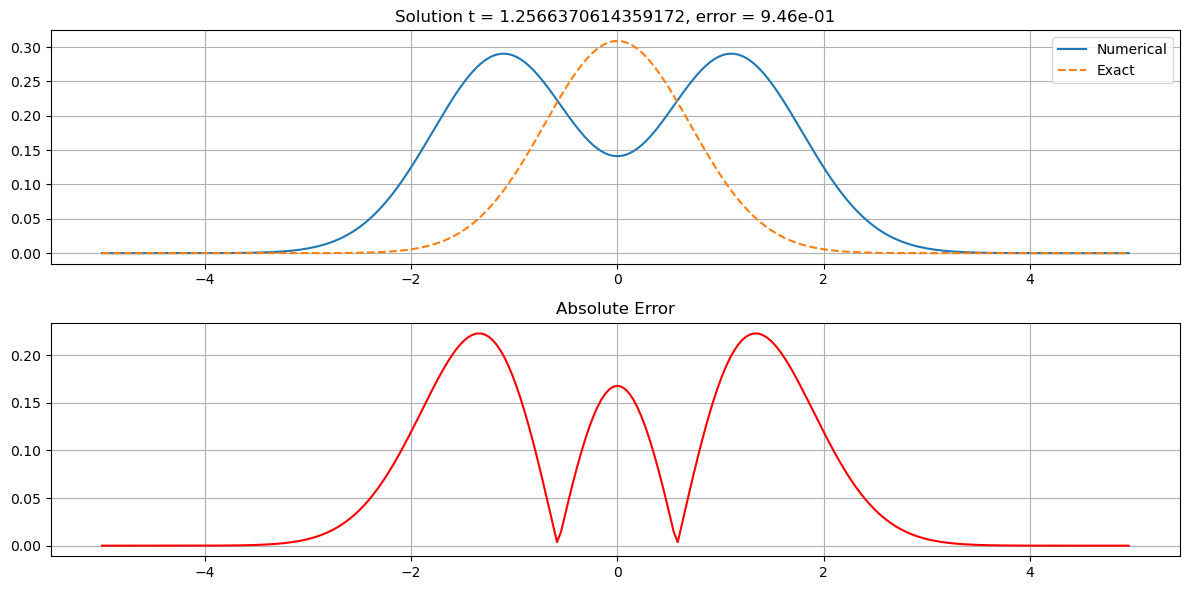

Closest available time to t_eval=2.5132741228718345: 2.5132741228718345
Test error t = 2.5132741228718345: 4.424e-01


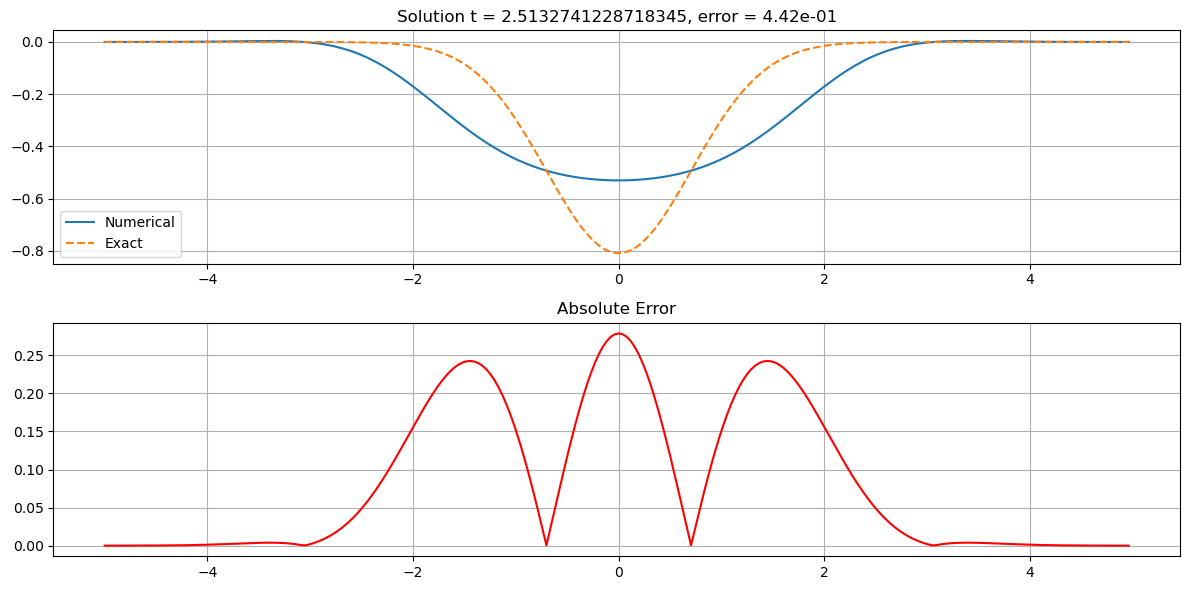

Closest available time to t_eval=3.7699111843077517: 3.769911184307752
Test error t = 3.769911184307752: 1.419e-01


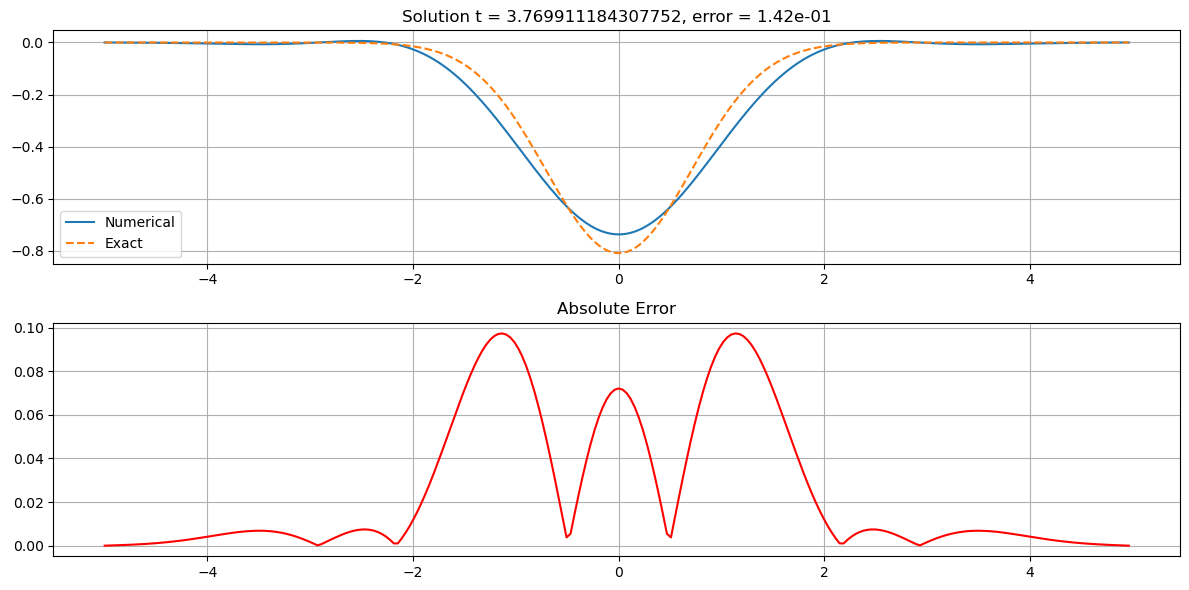

Closest available time to t_eval=5.026548245743669: 5.026548245743669
Test error t = 5.026548245743669: 3.098e-01


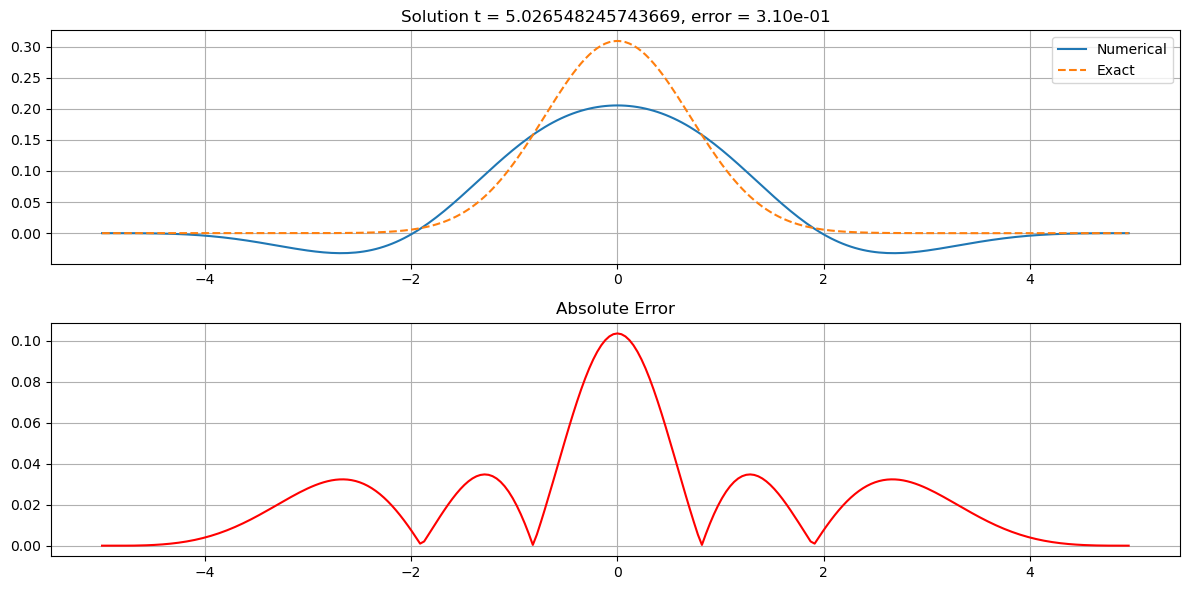

Closest available time to t_eval=6.283185307179586: 6.283185307179587
Test error t = 6.283185307179587: 1.843e-01


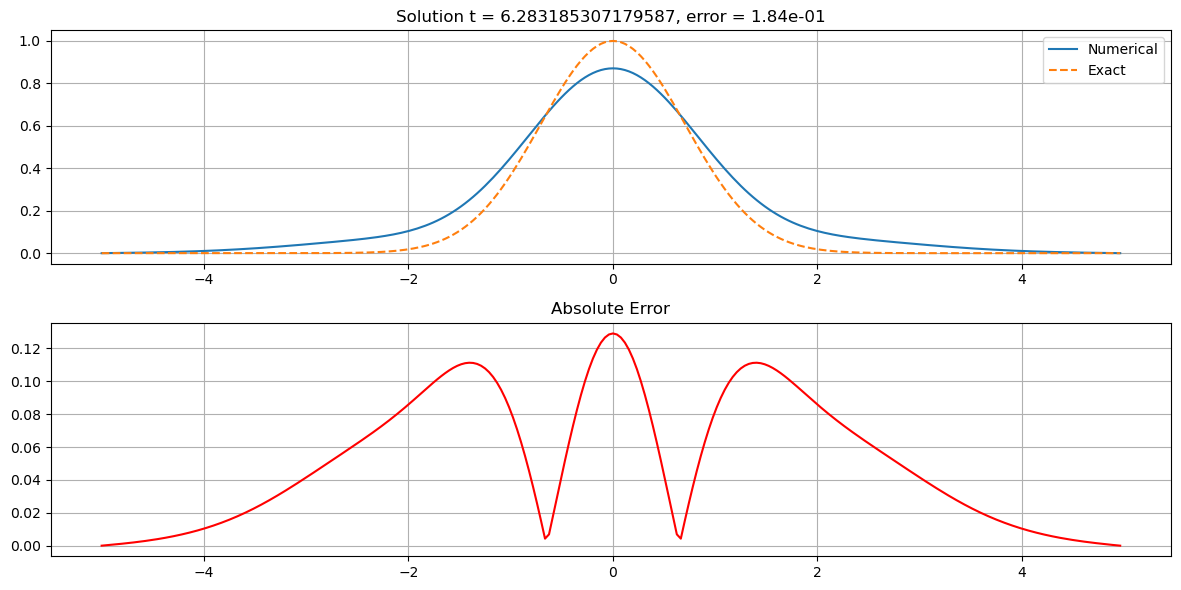

In [11]:
# Definition of symbols
t, x, xi = symbols('t x xi', real=True)
u = Function('u')

# Evolution equation
p_expr = x**2 + xi**2
equation = Eq(diff(u(t,x), t, t), -psiOp(p_expr, u(t,x)))

# Creation of the solver
solver = PDESolver(equation)

# Numerical parameters
Lx = 10.0
Nx = 256
Lt = 2 * np.pi   # To observe a complete period
Nt = 1000

# Initial condition: u₀(x) = exp(-x²)
initial_condition = lambda x: np.exp(-x**2)

# Initial velocity is zero
initial_velocity = lambda x: 0.0 * x

# Exact solution: cos(t) * exp(-x²)
def u_exact(x, t):
    return np.cos(t) * np.exp(-x**2)

# Setup of the solver
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition,
    initial_velocity=initial_velocity
)

# Solving
solver.solve()

# Validation tests
n_test = 5
for i in range(n_test + 1):
    t_eval = i * Lt / n_test
    solver.test(u_exact=u_exact, t_eval=t_eval, threshold=50, component='real')


## Legendre equation


*********************************
* Partial differential equation *
*********************************

 2                                
∂                    ⎛ 2         ⎞
───(u(t, x)) = -psiOp⎝ξ , u(t, x)⎠
  2                               
∂t                                

********************
* Equation parsing *
********************


Equation rewritten in standard form: psiOp(xi**2, u(t, x)) + Derivative(u(t, x), (t, 2))
⚠️ psiOp detected: skipping expansion for safety

Expanded equation: psiOp(xi**2, u(t, x)) + Derivative(u(t, x), (t, 2))
Analyzing term: psiOp(xi**2, u(t, x))
  --> Classified as pseudo linear term (psiOp)
Analyzing term: Derivative(u(t, x), (t, 2))
  Derivative found: Derivative(u(t, x), (t, 2))
  --> Classified as linear
Final linear terms: {Derivative(u(t, x), (t, 2)): 1}
Final nonlinear terms: []
Symbol terms: []
Pseudo terms: [(1, xi**2)]
Source terms: []
⚠️  Pseudo‑differential operator detected: all other linear terms have been rejected.

**************

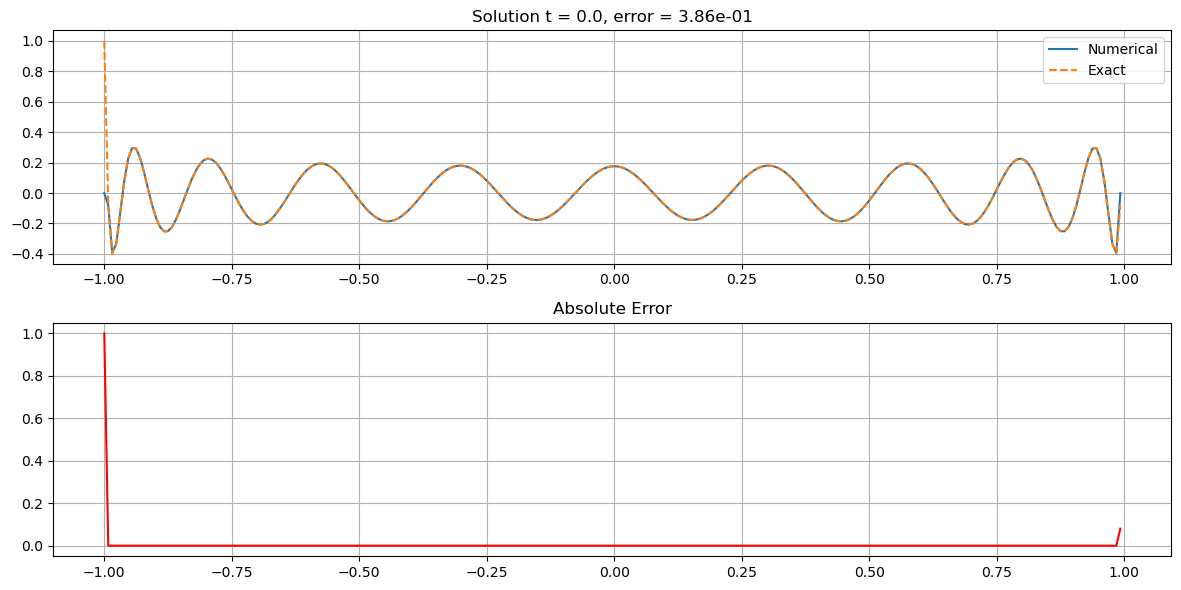

Closest available time to t_eval=0.06131760999625711: 0.061317609996257114
Test error t = 0.061317609996257114: 1.756e+00


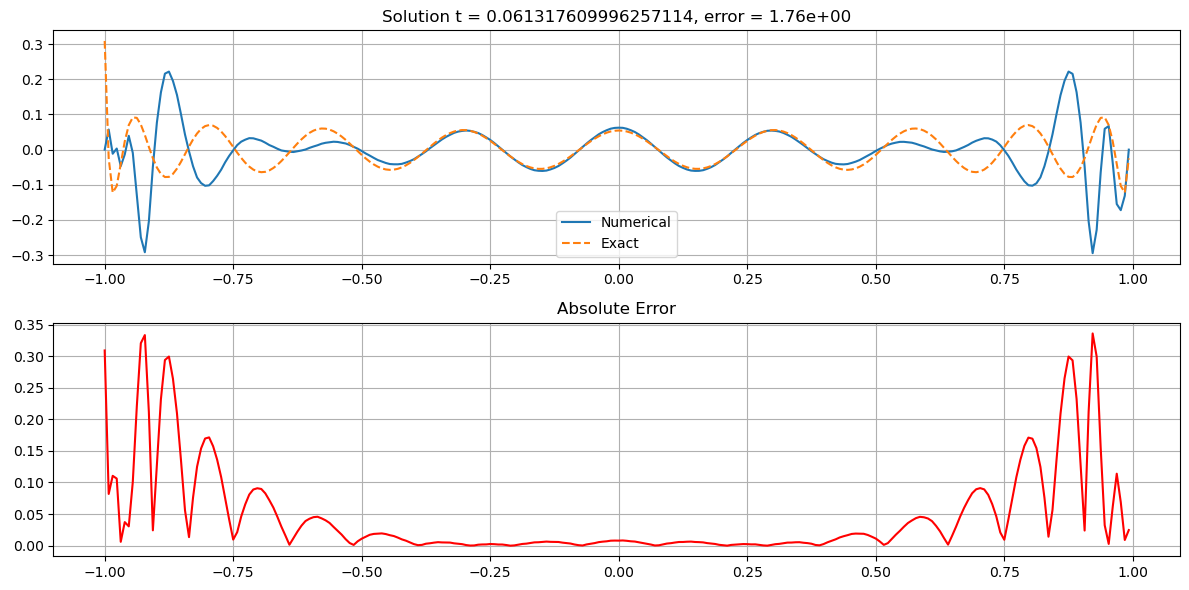

Closest available time to t_eval=0.12263521999251421: 0.12263521999251423
Test error t = 0.12263521999251423: 7.515e-01


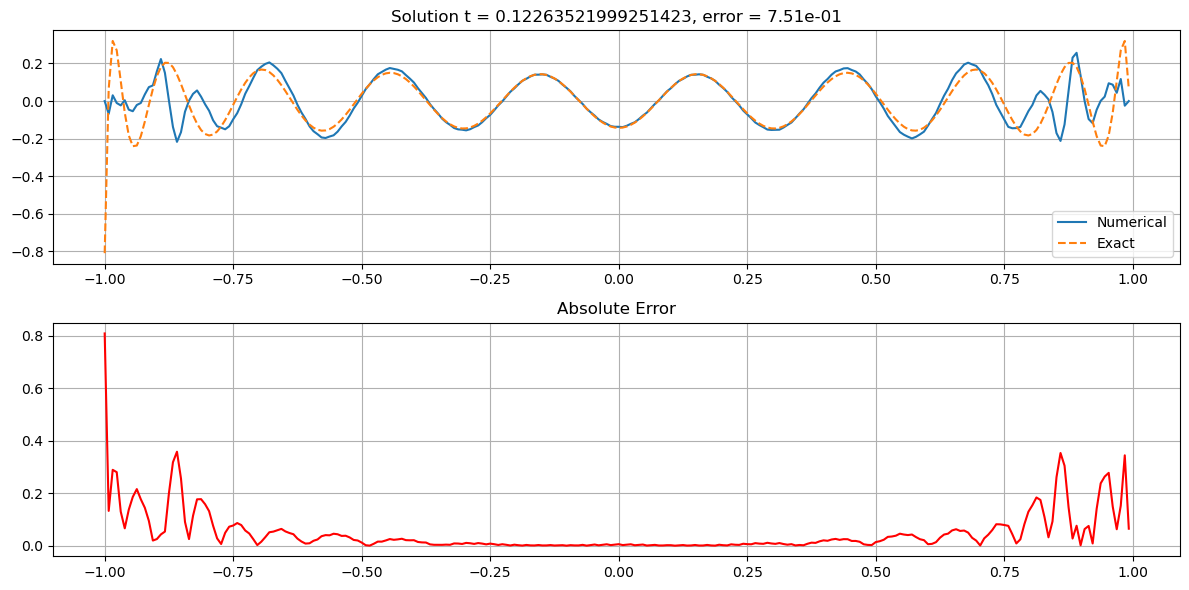

Closest available time to t_eval=0.18395282998877133: 0.18395282998877133
Test error t = 0.18395282998877133: 1.214e+00


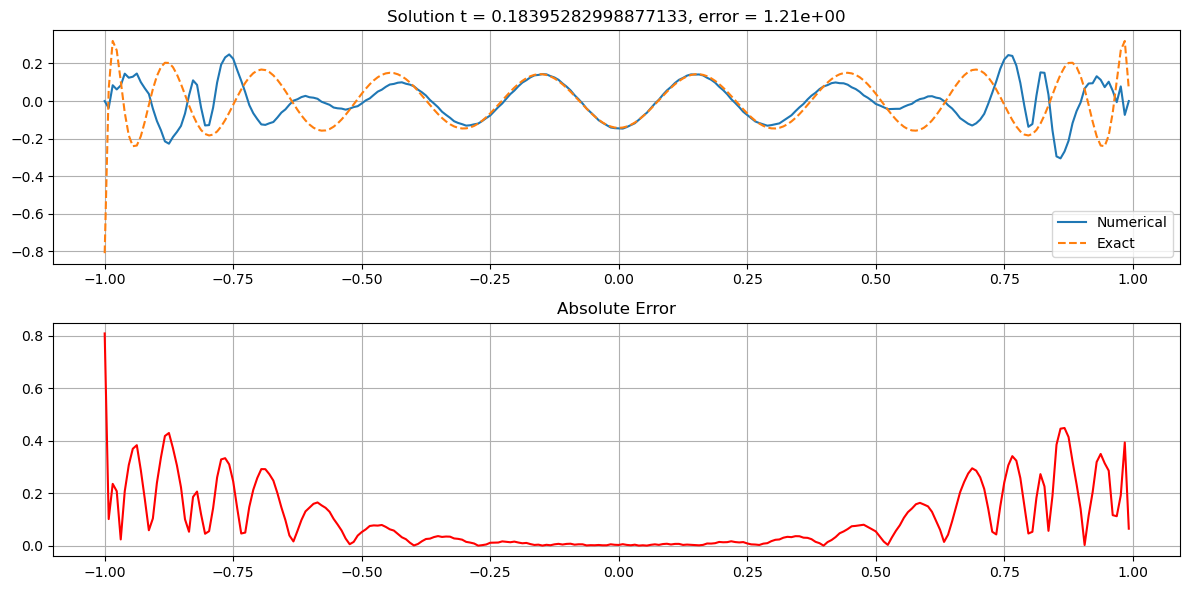

Closest available time to t_eval=0.24527043998502843: 0.24527043998502845
Test error t = 0.24527043998502845: 2.113e+00


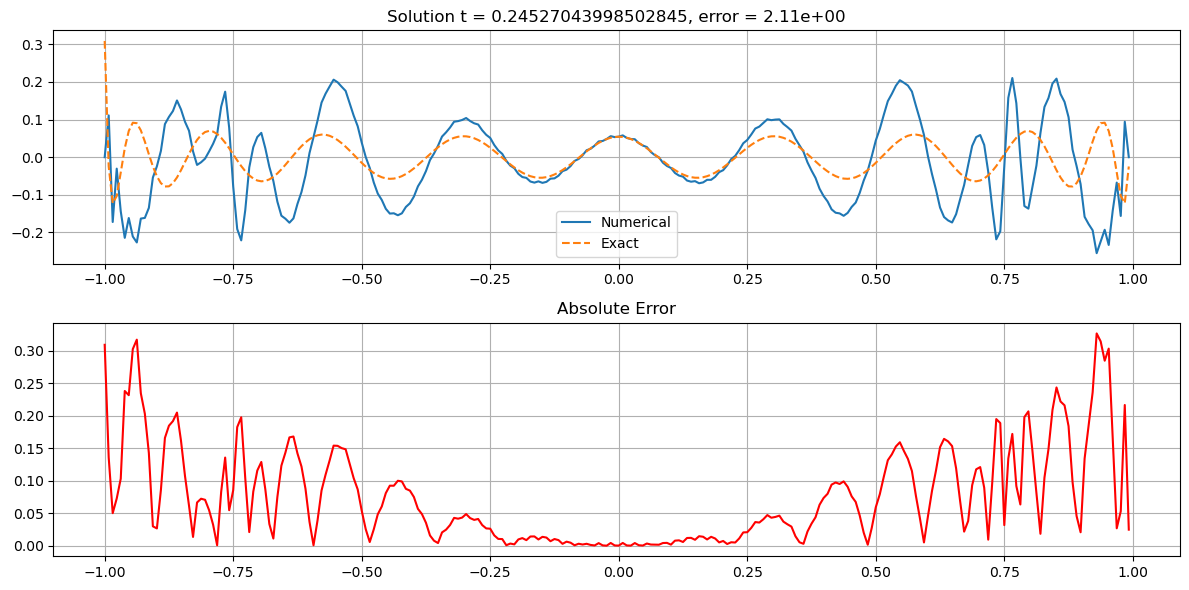

Closest available time to t_eval=0.3065880499812855: 0.3065880499812856
Test error t = 0.3065880499812856: 9.199e-01


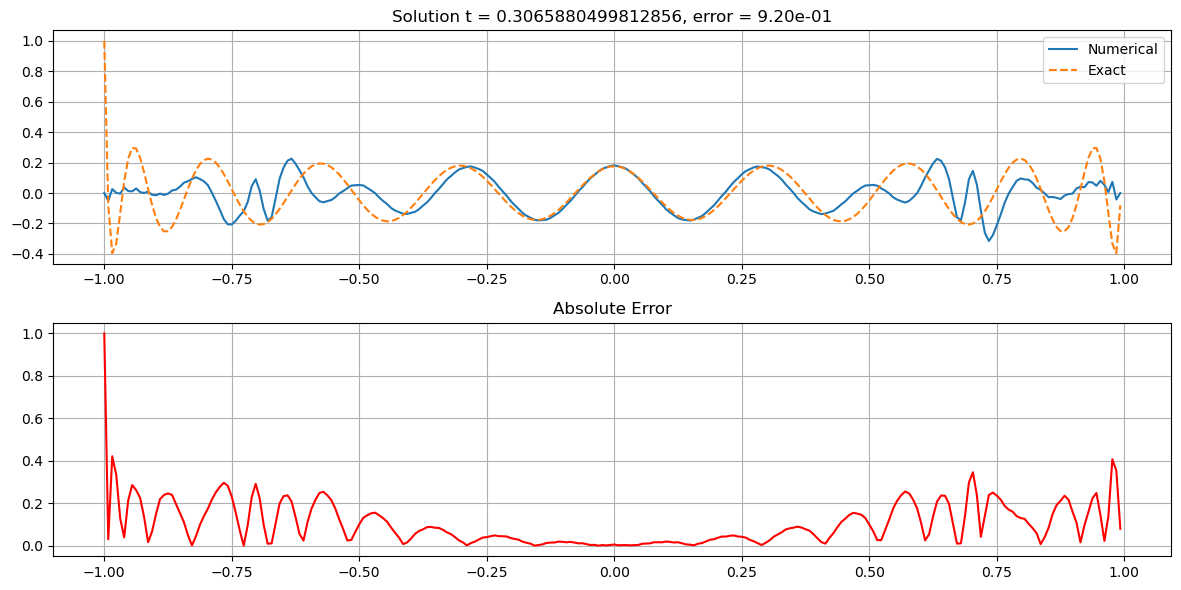

In [12]:
# Symbols
t, x, xi = symbols('t x xi', real=True)
u = Function('u')
# Order of the Legendre polynomial
n = 20
P_n = legendre(n)
lambda_n = n * (n + 1)
# Equation: ∂tt u = -ψOp(ξ², u)
p_expr = xi**2
equation = Eq(diff(u(t,x), t, t), -psiOp(p_expr, u(t,x)))
# Creating the solver
solver = PDESolver(equation)
# Domain [-1, 1] -> Lx = 2
Lx = 2.0
Nx = 256
Lt = 2 * np.pi / np.sqrt(lambda_n)  # period of the oscillation
Nt = 500
# Initial condition: Pₙ(x)
initial_condition = lambda x: P_n(2 * x / Lx)  # scales x ∈ [-1, 1]
initial_velocity = lambda x: 0 * x
# Exact solution
def u_exact(x, t):
    x_scaled = 2 * x / Lx  # scales x ∈ [-1,1]
    return np.cos(np.sqrt(lambda_n) * t) * P_n(x_scaled)
# Setup
solver.setup(
    Lx=Lx,
    Nx=Nx,
    Lt=Lt,
    Nt=Nt,
    boundary_condition='dirichlet',
    initial_condition=initial_condition,
    initial_velocity=initial_velocity
)
# Solving
solver.solve()
# Validation
n_test = 5
for i in range(n_test + 1):
    t_eval = i * Lt / n_test
    solver.test(u_exact=u_exact, t_eval=t_eval, threshold=50, component='real')
